In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 51.5 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

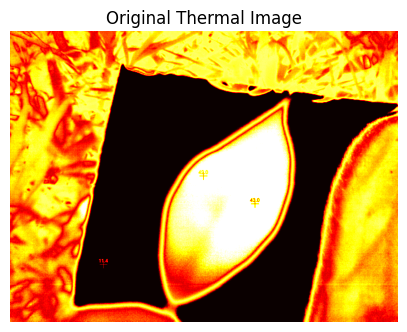

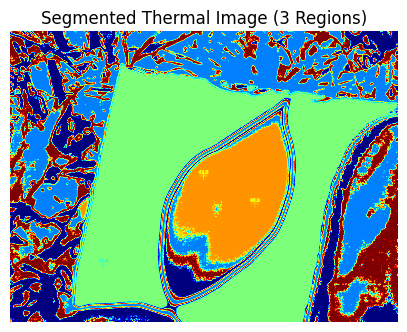

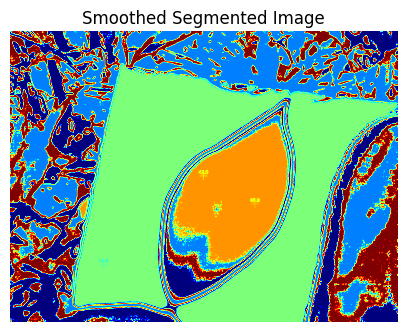

In [ ]:
image_name='/content/IR_01382.jpg'
thermal_image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(thermal_image, cmap='hot')
plt.title('Original Thermal Image')
plt.axis('off')
plt.show()

img_flat = thermal_image.reshape(-1, 1)

img_flat_normalized = img_flat / 255.0

pca = PCA(n_components=1)
pca_result = pca.fit_transform(img_flat_normalized)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_result)
labels = kmeans.labels_

segmented_image = labels.reshape(thermal_image.shape)

plt.figure(figsize=(5, 5))
plt.imshow(segmented_image, cmap='jet')
plt.title('Segmented Thermal Image (3 Regions)')
plt.axis('off')
plt.show()

segmented_image_smooth = cv2.GaussianBlur(segmented_image.astype(np.float32), (5, 5), 0)

plt.figure(figsize=(5, 5))
plt.imshow(segmented_image_smooth, cmap='jet')
plt.title('Smoothed Segmented Image')
plt.axis('off')
plt.show()


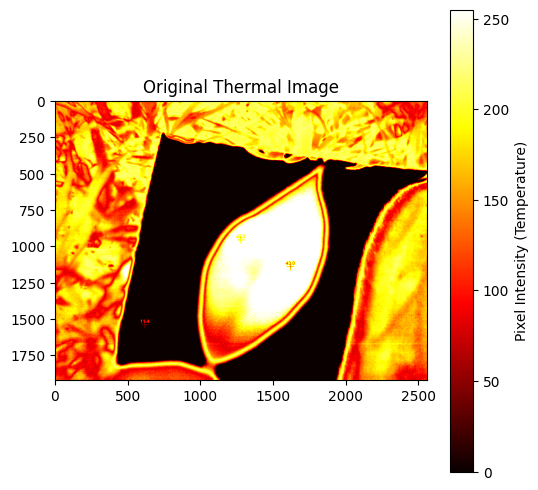

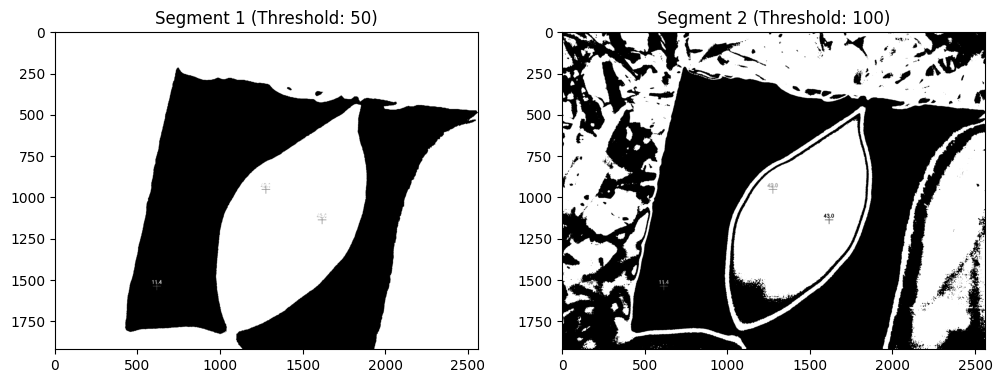

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

thermal_image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(thermal_image, cmap='hot')
plt.title('Original Thermal Image')
plt.colorbar(label='Pixel Intensity (Temperature)')
plt.show()

_, thresh1 = cv2.threshold(thermal_image, 50, 255, cv2.THRESH_BINARY)  # Lower threshold
_, thresh2 = cv2.threshold(thermal_image, 150, 255, cv2.THRESH_BINARY)  # Higher threshold

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Segment 1 (Threshold: 50)')

plt.subplot(1, 2, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Segment 2 (Threshold: 100)')

plt.show()


For n_clusters = 2, the Silhouette Score is 0.7242671736813742
For n_clusters = 3, the Silhouette Score is 0.7056787738754694
For n_clusters = 4, the Silhouette Score is 0.7218227403298695
For n_clusters = 5, the Silhouette Score is 0.7321526890924323
For n_clusters = 6, the Silhouette Score is 0.7339174732916832
For n_clusters = 7, the Silhouette Score is 0.7258196627791001
For n_clusters = 8, the Silhouette Score is 0.7228528695846338
For n_clusters = 9, the Silhouette Score is 0.7130570106695236
Optimal number of clusters is: 6


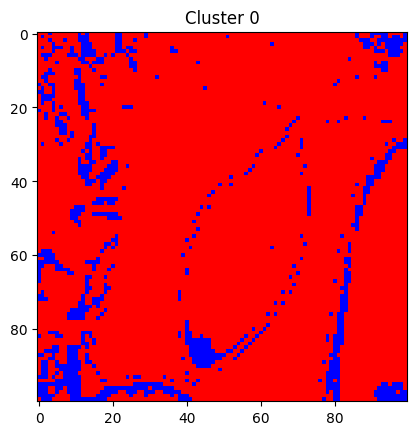

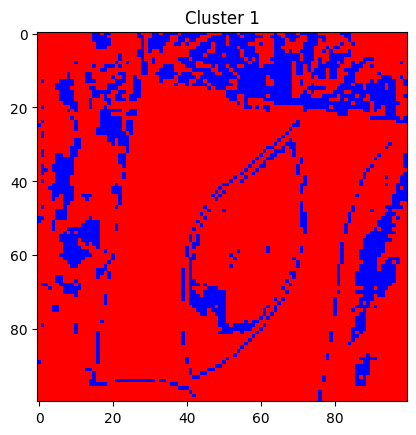

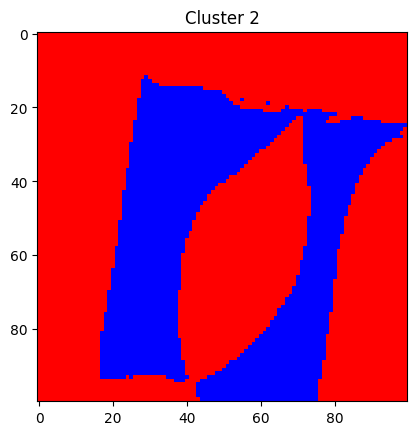

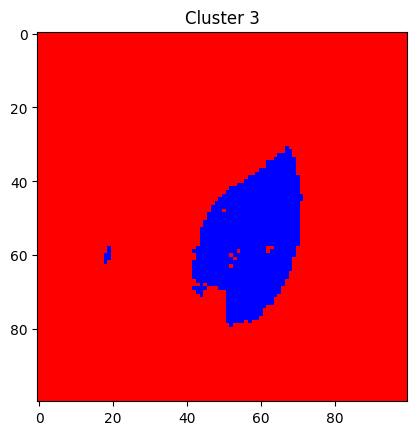

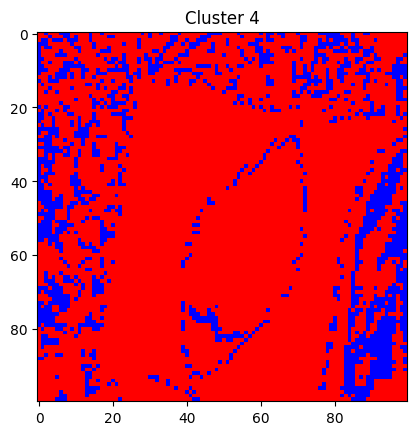

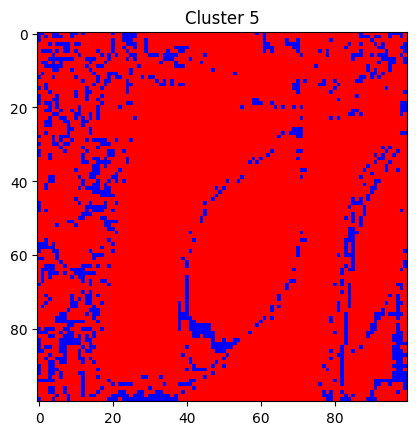

In [ ]:
 import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

image_path = '/content/IR_01382.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image, (100, 100))
flat_image = gray_image.flatten().reshape(-1, 1)

best_score = -1
best_k = 2
best_labels = None

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(flat_image)
    labels = kmeans.labels_

    score = silhouette_score(flat_image, labels)
    print(f'For n_clusters = {k}, the Silhouette Score is {score}')

    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f'Optimal number of clusters is: {best_k}')

clustered_image = best_labels.reshape(gray_image.shape)

for i in range(best_k):
    cluster_mask = (clustered_image == i).astype(np.uint8) * 255

    cluster_viz = np.zeros_like(image)
    cluster_viz[..., 0] = cluster_mask
    cluster_viz[..., 2] = 255 - cluster_mask

    plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i}')
    plt.show()


For n_clusters = 2, the Silhouette Score is 0.9808451071468002
For n_clusters = 3, the Silhouette Score is 0.9690403774334063
For n_clusters = 4, the Silhouette Score is 0.9489798712066191
For n_clusters = 5, the Silhouette Score is 0.9498494881607489
For n_clusters = 6, the Silhouette Score is 0.9432901295689131
For n_clusters = 7, the Silhouette Score is 0.9457543638585768
For n_clusters = 8, the Silhouette Score is 0.9439905051322633
For n_clusters = 9, the Silhouette Score is 0.944838187385172
Optimal number of clusters is: 2


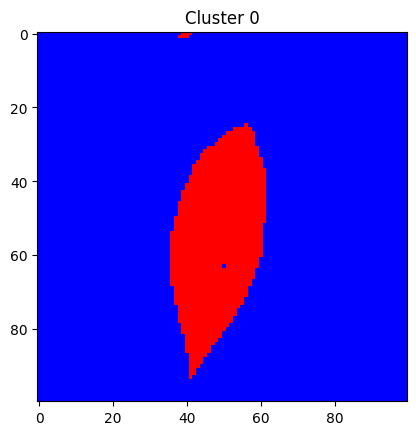

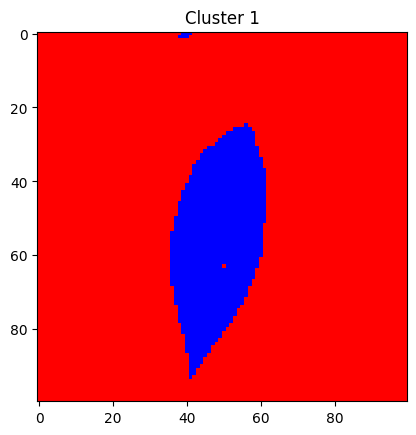

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

image_path = '/content/IR_01383.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image, (100, 100))

flat_image = gray_image.flatten().reshape(-1, 1)

best_score = -1
best_k = 2
best_labels = None

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(flat_image)
    labels = kmeans.labels_

    score = silhouette_score(flat_image, labels)
    print(f'For n_clusters = {k}, the Silhouette Score is {score}')

    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f'Optimal number of clusters is: {best_k}')

clustered_image = best_labels.reshape(gray_image.shape)

for i in range(best_k):
    cluster_mask = (clustered_image == i).astype(np.uint8) * 255

    cluster_viz = np.zeros_like(image)
    cluster_viz[..., 0] = cluster_mask
    cluster_viz[..., 2] = 255 - cluster_mask

    plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i}')
    plt.show()


For n_clusters = 2, the Silhouette Score is 0.8682077528808381
For n_clusters = 3, the Silhouette Score is 0.9169694647313487
For n_clusters = 4, the Silhouette Score is 0.9244213809726852
For n_clusters = 5, the Silhouette Score is 0.915132348204284
For n_clusters = 6, the Silhouette Score is 0.9140241342082825
For n_clusters = 7, the Silhouette Score is 0.9024351401990499
For n_clusters = 8, the Silhouette Score is 0.9015712523877152
For n_clusters = 9, the Silhouette Score is 0.8837689298348714
Optimal number of clusters is: 4


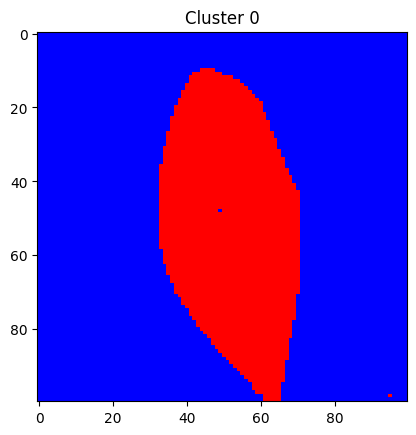

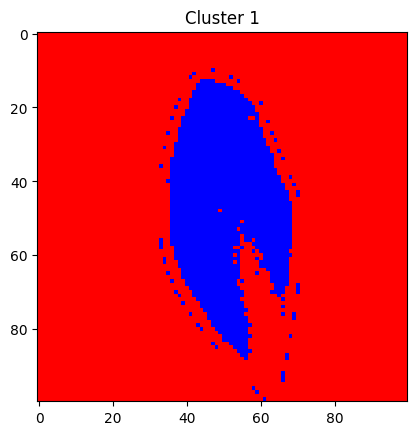

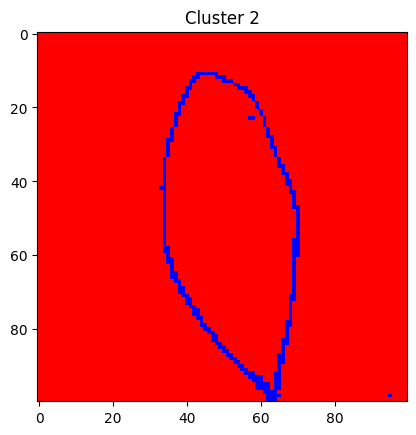

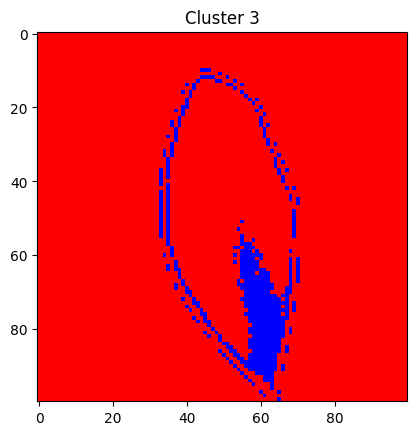

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

image_path = '/content/IR_01387.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image, (100, 100))

flat_image = gray_image.flatten().reshape(-1, 1)

best_score = -1
best_k = 2
best_labels = None

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(flat_image)
    labels = kmeans.labels_

    score = silhouette_score(flat_image, labels)
    print(f'For n_clusters = {k}, the Silhouette Score is {score}')

    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f'Optimal number of clusters is: {best_k}')

clustered_image = best_labels.reshape(gray_image.shape)

for i in range(best_k):
    cluster_mask = (clustered_image == i).astype(np.uint8) * 255

    cluster_viz = np.zeros_like(image)
    cluster_viz[..., 0] = cluster_mask
    cluster_viz[..., 2] = 255 - cluster_mask

    plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i}')
    plt.show()


For n_clusters = 2, the Silhouette Score is 0.6890314084065435
For n_clusters = 3, the Silhouette Score is 0.7026082794930708
For n_clusters = 4, the Silhouette Score is 0.7308355639535438
For n_clusters = 5, the Silhouette Score is 0.7171260535811022
For n_clusters = 6, the Silhouette Score is 0.684920127287988
For n_clusters = 7, the Silhouette Score is 0.6722693556861479
For n_clusters = 8, the Silhouette Score is 0.6399980223204035
For n_clusters = 9, the Silhouette Score is 0.6038719312196833
Optimal number of clusters is: 4


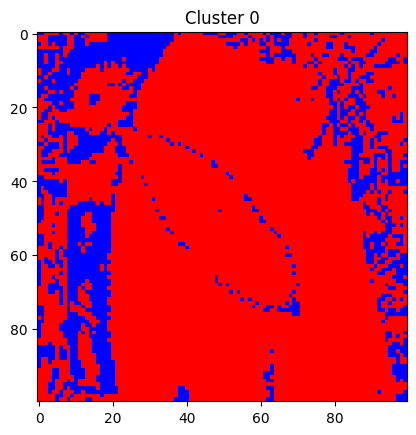

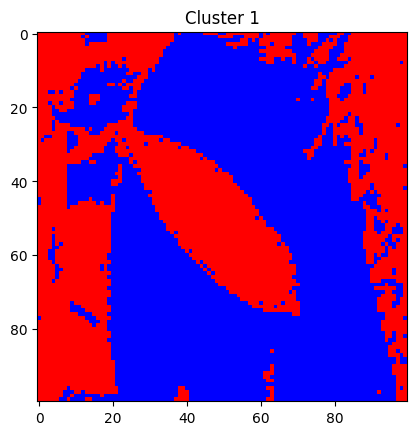

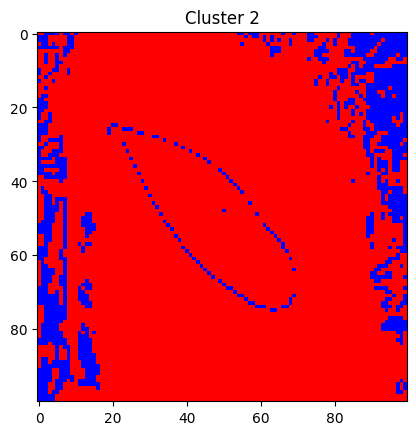

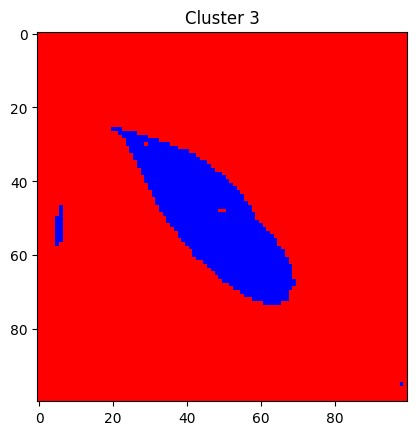

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

image_path = '/content/IR_01379.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image, (100, 100))

flat_image = gray_image.flatten().reshape(-1, 1)

best_score = -1
best_k = 2
best_labels = None

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(flat_image)
    labels = kmeans.labels_

    score = silhouette_score(flat_image, labels)
    print(f'For n_clusters = {k}, the Silhouette Score is {score}')

    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f'Optimal number of clusters is: {best_k}')

clustered_image = best_labels.reshape(gray_image.shape)

for i in range(best_k):
    cluster_mask = (clustered_image == i).astype(np.uint8) * 255

    cluster_viz = np.zeros_like(image)
    cluster_viz[..., 0] = cluster_mask
    cluster_viz[..., 2] = 255 - cluster_mask

    plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i}')
    plt.show()


For n_clusters = 2, the Silhouette Score is 0.9896798612551604
For n_clusters = 3, the Silhouette Score is 0.991026206044213
For n_clusters = 4, the Silhouette Score is 0.9904824993163373
For n_clusters = 5, the Silhouette Score is 0.9905896404947249
For n_clusters = 6, the Silhouette Score is 0.9904764996956165
For n_clusters = 7, the Silhouette Score is 0.9902881682346253
For n_clusters = 8, the Silhouette Score is 0.9895161811037378
For n_clusters = 9, the Silhouette Score is 0.9889979253707628
Optimal number of clusters is: 3


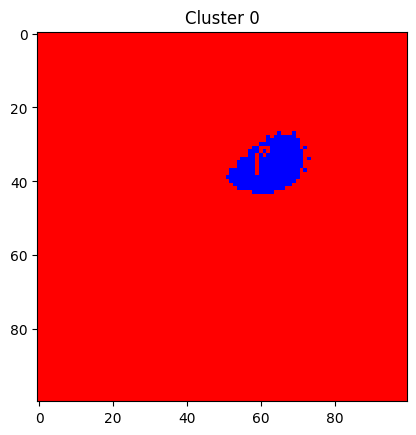

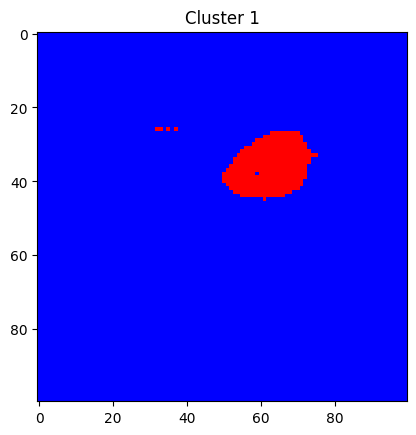

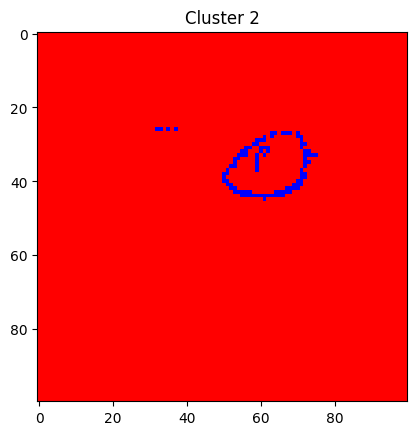

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

image_path = '/content/IR_01373.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

flat_image = gray_image.flatten().reshape(-1, 1)

best_score = -1
best_k = 2
best_labels = None

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(flat_image)
    labels = kmeans.labels_

    score = silhouette_score(flat_image, labels)
    print(f'For n_clusters = {k}, the Silhouette Score is {score}')

    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f'Optimal number of clusters is: {best_k}')

clustered_image = best_labels.reshape(gray_image.shape)

for i in range(best_k):
    cluster_mask = (clustered_image == i).astype(np.uint8) * 255

    cluster_viz = np.zeros_like(image)
    cluster_viz[..., 0] = cluster_mask
    cluster_viz[..., 2] = 255 - cluster_mask

    plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i}')
    plt.show()


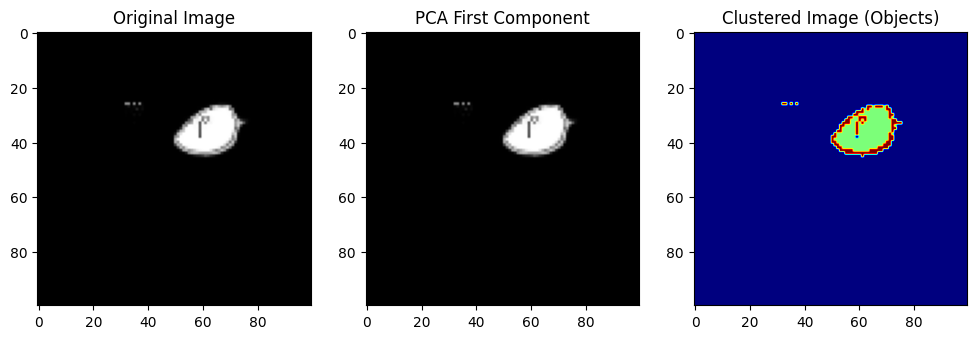

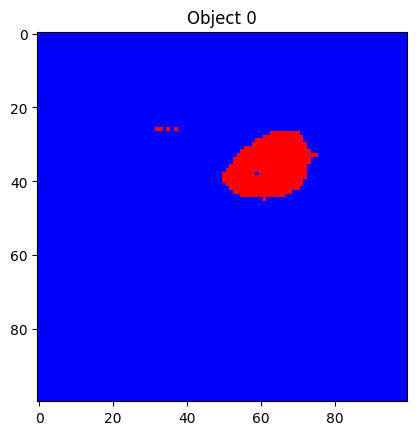

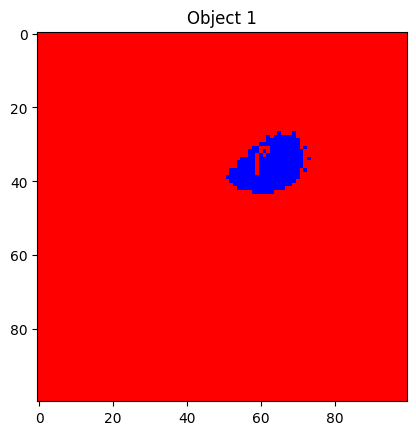

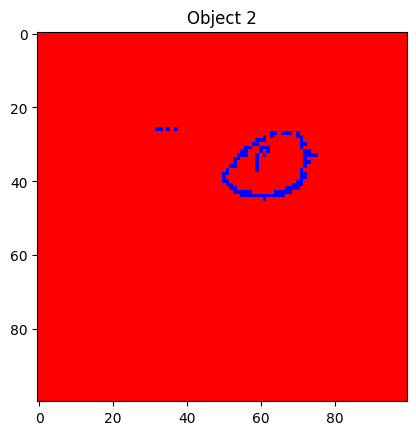

Number of objects detected: 3


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

image_path = '/content/IR_01373.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = gray_image / 255.0

flat_image = gray_image.flatten().reshape(-1, 1)

pca = PCA(n_components=1)
pca_result = pca.fit_transform(flat_image)

pca_image = pca_result[:, 0].reshape(gray_image.shape)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pca_result)

clustered_image = kmeans.labels_.reshape(gray_image.shape)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(pca_image, cmap='gray')
plt.title('PCA First Component')

plt.subplot(1, 3, 3)
plt.imshow(clustered_image, cmap='jet')
plt.title('Clustered Image (Objects)')

plt.show()

unique_clusters = np.unique(clustered_image)

for cluster in unique_clusters:
    mask = (clustered_image == cluster).astype(np.uint8) * 255

    highlighted_image = np.zeros_like(image)
    highlighted_image[..., 0] = mask
    highlighted_image[..., 2] = 255 - mask

    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Object {cluster}')
    plt.show()

print(f'Number of objects detected: {len(unique_clusters)}')


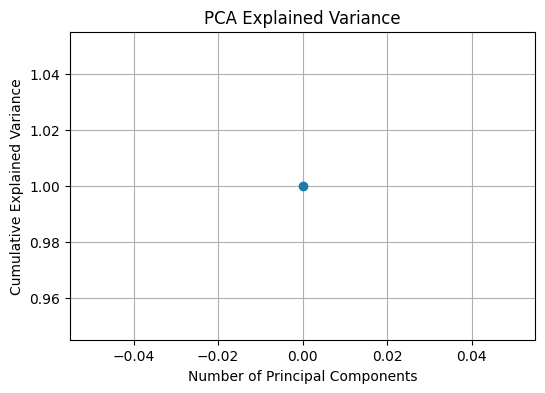

Number of components to retain for 90.0% variance: 1


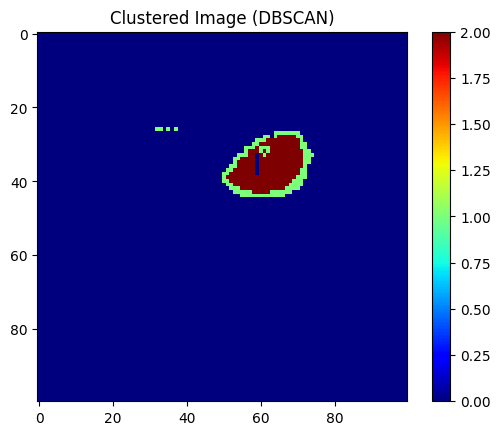

Number of clusters detected: 3


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

image_path = '/content/IR_01373.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (100, 100))

gray_image = image / 255.0

flat_image = gray_image.flatten().reshape(-1, 1)

pca = PCA(n_components=min(flat_image.shape[0], flat_image.shape[1]))
pca_result = pca.fit_transform(flat_image)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

threshold_variance = 0.90
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= threshold_variance) + 1

print(f'Number of components to retain for {threshold_variance * 100}% variance: {n_components}')

pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(flat_image)

dbscan = DBSCAN(eps=0.05, min_samples=10)
dbscan_labels = dbscan.fit_predict(pca_result)

clustered_image = dbscan_labels.reshape(gray_image.shape)

plt.imshow(clustered_image, cmap='jet')
plt.title('Clustered Image (DBSCAN)')
plt.colorbar()
plt.show()

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of clusters detected: {n_clusters}')


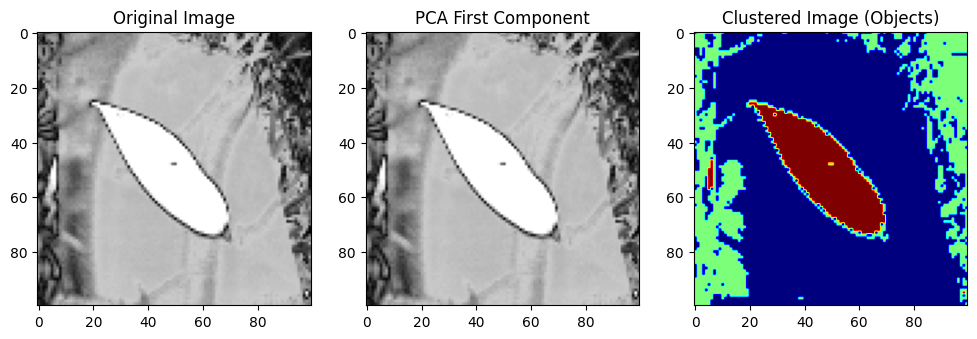

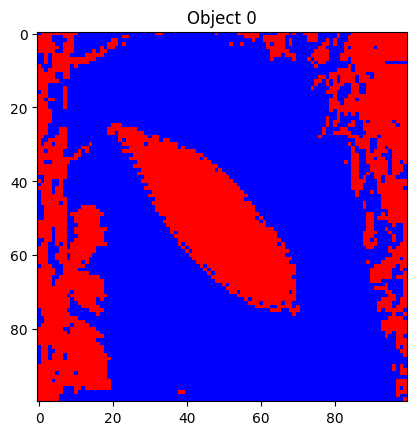

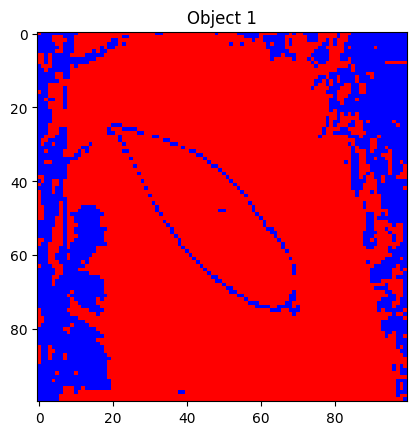

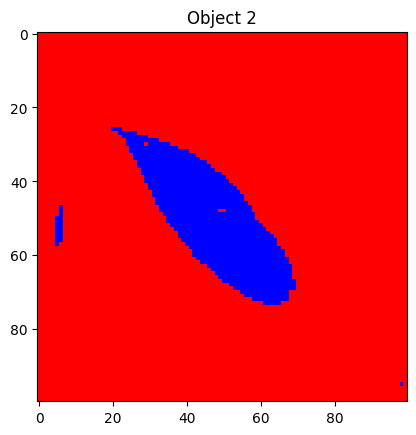

Number of objects detected: 3


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

image_path = '/content/IR_01379.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = gray_image / 255.0

flat_image = gray_image.flatten().reshape(-1, 1)

pca = PCA(n_components=1)
pca_result = pca.fit_transform(flat_image)

pca_image = pca_result[:, 0].reshape(gray_image.shape)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pca_result)

clustered_image = kmeans.labels_.reshape(gray_image.shape)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(pca_image, cmap='gray')
plt.title('PCA First Component')

plt.subplot(1, 3, 3)
plt.imshow(clustered_image, cmap='jet')
plt.title('Clustered Image (Objects)')

plt.show()

unique_clusters = np.unique(clustered_image)

for cluster in unique_clusters:
    mask = (clustered_image == cluster).astype(np.uint8) * 255

    highlighted_image = np.zeros_like(image)
    highlighted_image[..., 0] = mask
    highlighted_image[..., 2] = 255 - mask

    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Object {cluster}')
    plt.show()

print(f'Number of objects detected: {len(unique_clusters)}')


Text(0.5, 1.0, 'Temperature Scaled Image')

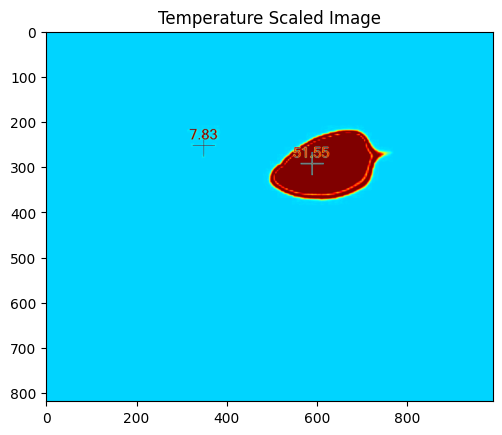

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/IR_01373.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_temp, max_temp = 20, 80
scaled_image = (gray_image / 255.0) * (max_temp - min_temp) + min_temp

colored_temp_image = cv2.applyColorMap(cv2.convertScaleAbs(scaled_image, alpha=255.0/(max_temp-min_temp)), cv2.COLORMAP_JET)

plt.imshow(cv2.cvtColor(colored_temp_image, cv2.COLOR_BGR2RGB))
plt.title('Temperature Scaled Image')

In [ ]:
import rasterio
def load_image(file_path):
    """
    Load the IS2 image using rasterio.

    :param file_path: Path to the IS2 image file.
    :return: 3D NumPy array (height, width, num_bands).
    """
    with rasterio.open(file_path) as src:
        image = src.read()  # Read the image data
        image = np.moveaxis(image, 0, -1)  # Move bands to the last dimension (height, width, num_bands)
    return image

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Image dimensions: 819 x 990 x 3


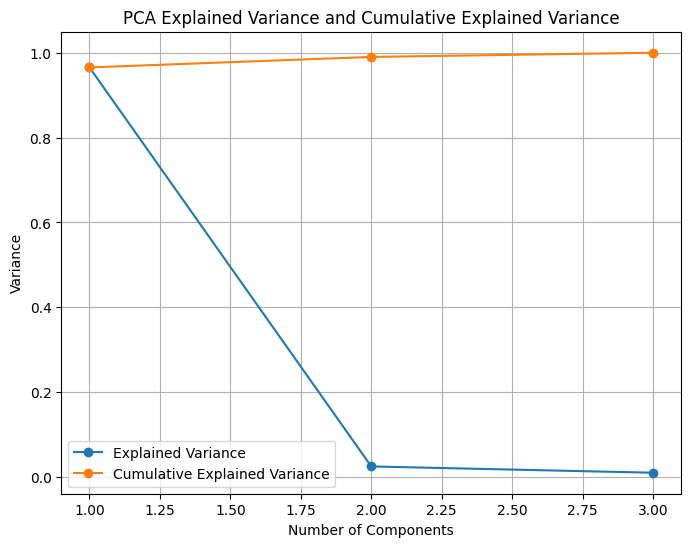

Optimal number of endmembers (components) based on the elbow method: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import rasterio

# Function to load the image using rasterio
def load_image(file_path):
    with rasterio.open(file_path) as src:
        image = src.read()  # This reads the image as a 3D array (num_bands, height, width)
        image = np.moveaxis(image, 0, -1)  # Rearrange to (height, width, num_bands)
    return image

# Step 1: Load the image
file_path = '/content/IR_01373.jpg'
image = load_image(file_path)

# Assuming 'image' is your 3D image array (height, width, num_bands)
height, width, num_bands = image.shape
print(f"Image dimensions: {height} x {width} x {num_bands}")

# Reshape the image to (num_pixels, num_bands)
reshaped_image = image.reshape(-1, num_bands)

# Step 2: Standardize the data
scaler = StandardScaler()
reshaped_image_scaled = scaler.fit_transform(reshaped_image)

# Step 3: Apply PCA
pca = PCA()
pca.fit(reshaped_image_scaled)

# Explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Step 4: Plot explained variance and cumulative variance using elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('PCA Explained Variance and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Elbow Method - Find the number of components based on the elbow
# You can manually inspect the plot to choose the point where the curve flattens
# Here, for automatic elbow detection, we can use the difference in variance
differences = np.diff(cumulative_variance)
elbow_index = np.argmax(differences < 0.01) + 1  # Choose where the differences become small
print(f"Optimal number of endmembers (components) based on the elbow method: {elbow_index}")


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from scipy.linalg import eigh

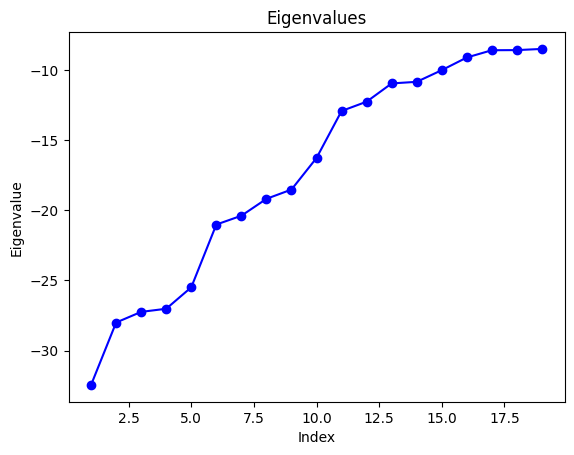

Optimal number of clusters determined by the Eigenvalue Gap Heuristic: 5


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


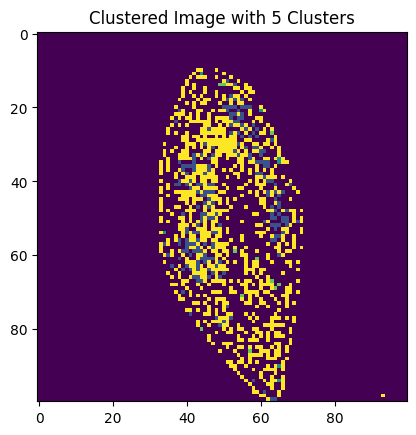

In [ ]:
# Step 1: Load the image and convert to grayscale
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (100, 100))
    if image is None:
        raise ValueError("Image not found or unable to load!")
    # Normalize pixel values (0-255 to 0-1)
    image = image.astype(np.float64) / 255.0
    return image

# Step 2: Create a similarity graph
def create_similarity_graph(image, n_neighbors=7):
    height, width = image.shape
    # Flatten the image to convert it into an array of pixels
    pixels = image.flatten().reshape(-1, 1)

    # Create a graph where each pixel is connected to its n_neighbors
    graph = kneighbors_graph(pixels, n_neighbors=n_neighbors, include_self=True)
    return graph.toarray()

# Step 3: Compute the Laplacian matrix
def compute_laplacian(graph):
    # Degree matrix (diagonal matrix)
    degree_matrix = np.diag(np.sum(graph, axis=1))
    # Laplacian matrix: L = D - A
    laplacian = degree_matrix - graph
    return laplacian

# Step 4: Compute eigenvalues and apply eigenvalue gap heuristic
def eigenvalue_gap_heuristic(laplacian, n_largest=20):
    # Compute the eigenvalues
    eigenvalues, _ = eigh(laplacian, eigvals=(1, n_largest - 1))

    # Plot eigenvalues to visually inspect the gap
    plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')
    plt.show()

    # Find the largest gap between consecutive eigenvalues
    gaps = np.diff(eigenvalues)
    optimal_clusters = np.argmax(gaps)  # The index with the largest gap
    print(f"Optimal number of clusters determined by the Eigenvalue Gap Heuristic: {optimal_clusters}")
    return optimal_clusters

# Step 5: Perform spectral clustering
def apply_spectral_clustering(image, n_clusters, graph):
    height, width = image.shape
    # Perform spectral clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans')
    labels = spectral.fit_predict(graph)

    # Reshape the labels back into the image shape
    clustered_image = labels.reshape(height, width)
    return clustered_image

# Main function to run the heuristic
def spectral_clustering_with_eigenvalue_gap(image_path):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)

    # Create a similarity graph
    graph = create_similarity_graph(image)

    # Compute the Laplacian matrix
    laplacian = compute_laplacian(graph)

    # Determine optimal number of clusters using the Eigenvalue Gap Heuristic
    optimal_clusters = eigenvalue_gap_heuristic(laplacian)

    # Apply spectral clustering
    clustered_image = apply_spectral_clustering(image, optimal_clusters, graph)

    # Display the clustered image
    plt.imshow(clustered_image, cmap='viridis')
    plt.title(f'Clustered Image with {optimal_clusters} Clusters')
    plt.show()

# Example usage:
image_path = '/content/IR_01387.jpg'  # Path to your thermal image
spectral_clustering_with_eigenvalue_gap(image_path)

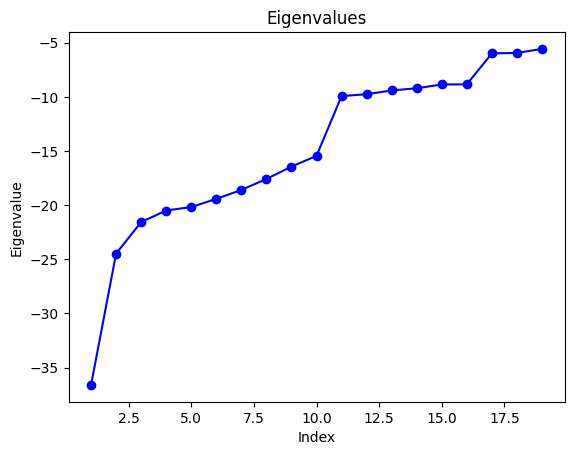

Optimal number of clusters determined by the Eigenvalue Gap Heuristic: 1


ValueError: Negative values in data passed to NMF (input X)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from scipy.linalg import eigh

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (50, 50))
    if image is None:
        raise ValueError("Image not found or unable to load!")
    # Normalize pixel values (0-255 to 0-1)
    image = image.astype(np.float64) / 255.0
    return image

def create_similarity_graph(image, n_neighbors=7):
    height, width,depth = image.shape
    # Flatten the image to convert it into an array of pixels
    pixels = image.flatten().reshape(-1, 1)

    # Create a graph where each pixel is connected to its n_neighbors
    graph = kneighbors_graph(pixels, n_neighbors=n_neighbors, include_self=True)
    return graph.toarray()

# Step 3: Compute the Laplacian matrix
def compute_laplacian(graph):
    # Degree matrix (diagonal matrix)
    degree_matrix = np.diag(np.sum(graph, axis=1))
    # Laplacian matrix: L = D - A
    laplacian = degree_matrix - graph
    return laplacian

# Step 4: Compute eigenvalues and apply eigenvalue gap heuristic
def eigenvalue_gap_heuristic(laplacian, n_largest=20):
    # Compute the eigenvalues
    eigenvalues, _ = eigh(laplacian, eigvals=(1, n_largest - 1))

    # Plot eigenvalues to visually inspect the gap
    plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')
    plt.show()

    # Find the largest gap between consecutive eigenvalues
    gaps = np.diff(eigenvalues)
    optimal_clusters = np.argmax(gaps) + 1  # The index with the largest gap
    print(f"Optimal number of clusters determined by the Eigenvalue Gap Heuristic: {optimal_clusters}")
    return optimal_clusters

def apply_pca(image_data, n_components):
    # Flatten the image data into 2D array (pixels x features)
    h, w, d = image_data.shape  # height, width, depth
    flattened = image_data.reshape(h * w, d)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(flattened)

    # Reshape back to image dimensions
    return pca_result.reshape(h, w, n_components)


def cluster_pixels(pca_data, eps=0.5, min_samples=5):
    # Flatten PCA image for clustering
    h, w, n_components = pca_data.shape
    flattened_pca = pca_data.reshape(h * w, n_components)

    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(flattened_pca)

    # Reshape clustering labels to image
    labels = clustering.labels_.reshape(h, w)

    return labels


def spectral_unmixing(pca_data, n_components):
    # Flatten the PCA image data
    h, w, d = pca_data.shape
    flattened = pca_data.reshape(h * w, d)

    # Apply NMF to estimate the proportions of each material/object in the mixed pixels
    nmf_model = NMF(n_components=n_components)
    W = nmf_model.fit_transform(flattened)  # Proportion matrix
    H = nmf_model.components_  # Material signature matrix

    return W, H
def detect_mixed_pixels(cluster_labels, W, threshold=0.5):
    # Calculate mixedness score based on the unmixing proportions
    mixedness_scores = np.sum(W > threshold, axis=1) > 1  # More than one material

    h, w = cluster_labels.shape
    return mixedness_scores.reshape(h, w)


def visualize_mixed_pixels(image, mixed_pixel_mask):
    plt.imshow(image, cmap='gray')
    plt.imshow(mixed_pixel_mask, cmap='jet', alpha=0.5)  # Overlay mixed pixels
    plt.show()


image_path = '/content/IR_01387.jpg'  # Path to your thermal image
image = load_and_preprocess_image(image_path)
graph = create_similarity_graph(image)
laplacian = compute_laplacian(graph)
optimal_clusters = eigenvalue_gap_heuristic(laplacian)
pca_data = apply_pca(image,optimal_clusters)
cluster_labels = cluster_pixels(pca_data)
W, H = spectral_unmixing(pca_data,optimal_clusters)
mixed_pixel_mask = detect_mixed_pixels(cluster_labels, W)


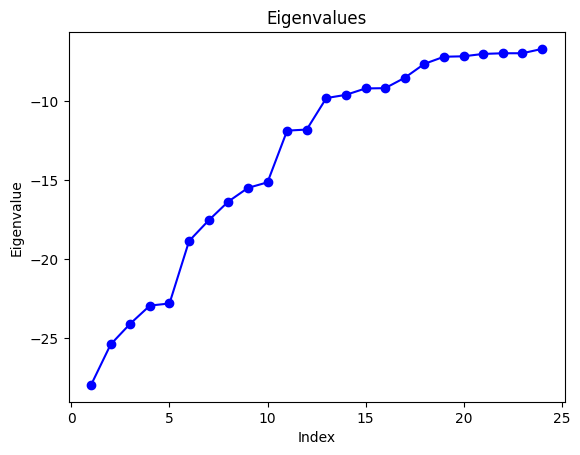

Optimal number of clusters determined by the Eigenvalue Gap Heuristic: 4


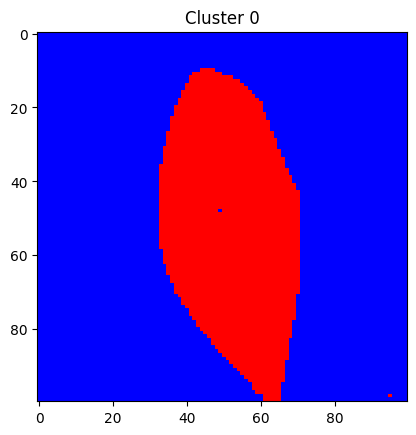

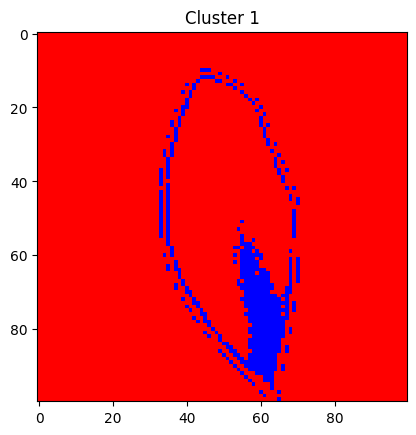

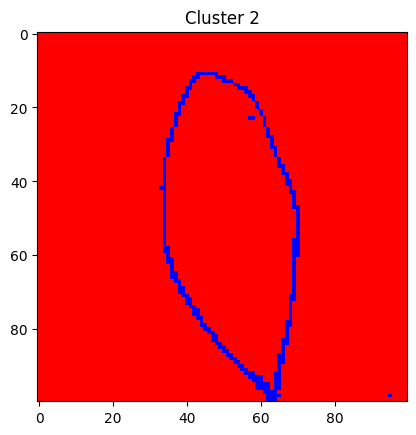

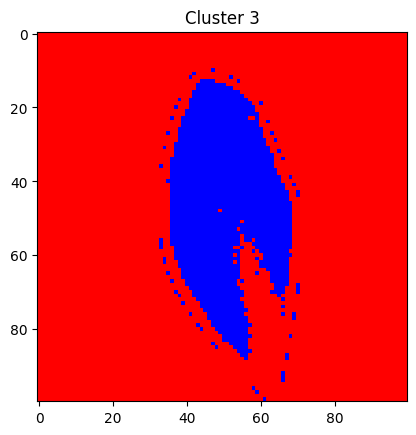

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from scipy.linalg import eigh

# Step 1: Load the image and convert to grayscale
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if image is None:
        raise ValueError("Image not found or unable to load!")
    return gray_image

# Step 2: Create a similarity graph
def create_similarity_graph(image, n_neighbors=5):
    height, width = image.shape
    # Flatten the image to convert it into an array of pixels
    pixels = image.flatten().reshape(-1, 1)

    # Create a graph where each pixel is connected to its n_neighbors
    graph = kneighbors_graph(pixels, n_neighbors=n_neighbors, include_self=True)
    return graph.toarray()

# Step 3: Compute the Laplacian matrix
def compute_laplacian(graph):
    # Degree matrix (diagonal matrix)
    degree_matrix = np.diag(np.sum(graph, axis=1))
    # Laplacian matrix: L = D - A
    laplacian = degree_matrix - graph
    return laplacian

# Step 4: Compute eigenvalues and apply eigenvalue gap heuristic
def eigenvalue_gap_heuristic(laplacian, n_largest=25):
    # Compute the eigenvalues
    eigenvalues, _ = eigh(laplacian, eigvals=(1, n_largest - 1))

    # Plot eigenvalues to visually inspect the gap
    plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')
    plt.show()

    # Find the largest gap between consecutive eigenvalues
    gaps = np.diff(eigenvalues)
    optimal_clusters = np.argmax(gaps[1:])  # The index with the largest gap
    print(f"Optimal number of clusters determined by the Eigenvalue Gap Heuristic: {optimal_clusters}")
    return optimal_clusters


# Main function to run the heuristic
def thermal_clustering_with_eigenvalue_gap(image_path):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)

    # Create a similarity graph
    graph = create_similarity_graph(image)

    # Compute the Laplacian matrix
    laplacian = compute_laplacian(graph)

    # Determine optimal number of clusters using the Eigenvalue Gap Heuristic
    k = eigenvalue_gap_heuristic(laplacian)

    flat_image = image.flatten().reshape(-1, 1)

    kmeans = KMeans(n_clusters=k)

    kmeans.fit(flat_image)
    best_labels = kmeans.labels_
    clustered_image = best_labels.reshape(image.shape)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100))

    for i in range(k):
      cluster_mask = (clustered_image == i).astype(np.uint8) * 255

      cluster_viz = np.zeros_like(image)
      cluster_viz[..., 0] = cluster_mask
      cluster_viz[..., 2] = 255 - cluster_mask

      plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
      plt.title(f'Cluster {i}')
      plt.show()


# Example usage:
image_path = '/content/IR_01387.jpg'  # Path to your thermal image
thermal_clustering_with_eigenvalue_gap(image_path)

For n_clusters = 2, the Silhouette Score is 0.8682077528808381
For n_clusters = 3, the Silhouette Score is 0.9171724618564078
For n_clusters = 4, the Silhouette Score is 0.9244213809726852
For n_clusters = 5, the Silhouette Score is 0.9151761680183423
For n_clusters = 6, the Silhouette Score is 0.9126819768591009
For n_clusters = 7, the Silhouette Score is 0.9024351401990499
For n_clusters = 8, the Silhouette Score is 0.9003060256508643
For n_clusters = 9, the Silhouette Score is 0.885136853769375
Optimal number of clusters is: 4


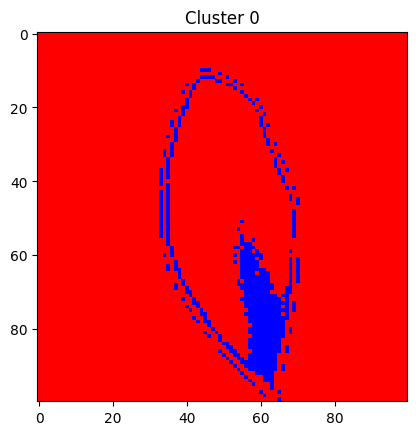

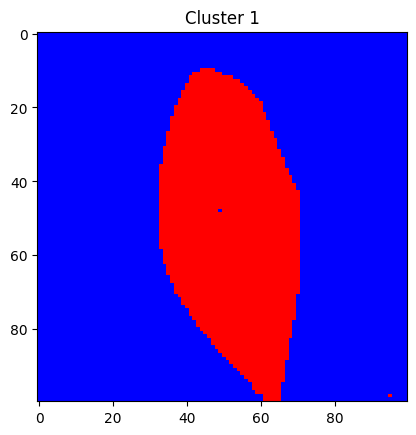

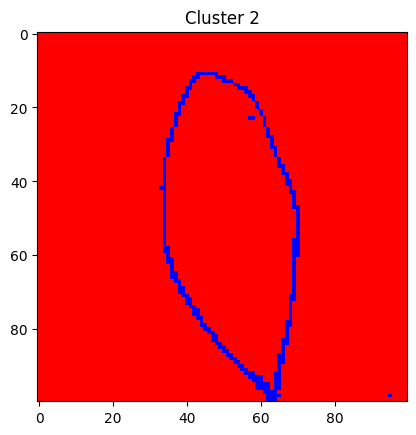

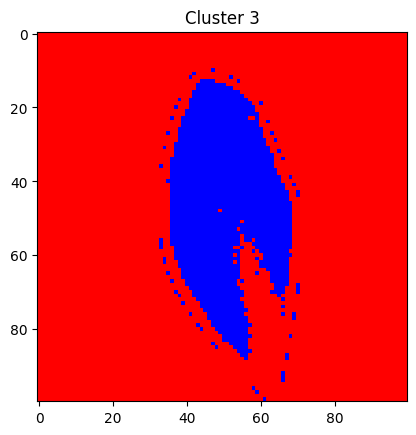

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

image_path = '/content/IR_01387.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

flat_image = gray_image.flatten().reshape(-1, 1)

best_score = -1
best_k = 2
best_labels = None

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(flat_image)
    labels = kmeans.labels_

    score = silhouette_score(flat_image, labels)
    print(f'For n_clusters = {k}, the Silhouette Score is {score}')

    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f'Optimal number of clusters is: {best_k}')

clustered_image = best_labels.reshape(gray_image.shape)

for i in range(best_k):
    cluster_mask = (clustered_image == i).astype(np.uint8) * 255

    cluster_viz = np.zeros_like(image)
    cluster_viz[..., 0] = cluster_mask
    cluster_viz[..., 2] = 255 - cluster_mask

    plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i}')
    plt.show()


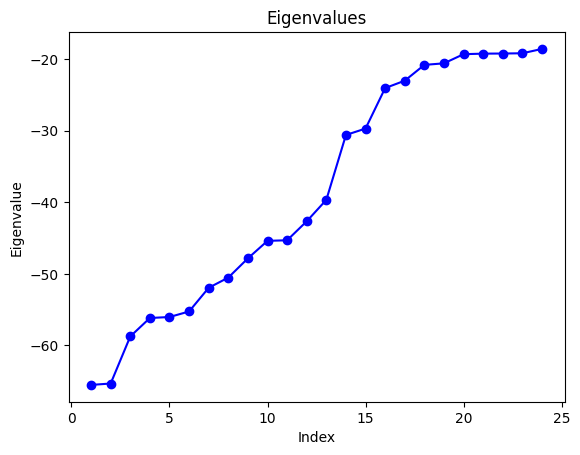

Optimal number of clusters determined by the Eigenvalue Gap Heuristic: 14
[0.19690734 6.57588434 2.57785867 0.13561297 0.77588112 3.3098357
 1.42255112 2.68870061 2.44530716 0.07862643 2.65357132 2.99611106
 9.0636657  0.89210717 5.65889025 1.03085651 2.2089538  0.21592987
 1.27766391 0.07614115 0.01672858 0.03566089 0.60738243]


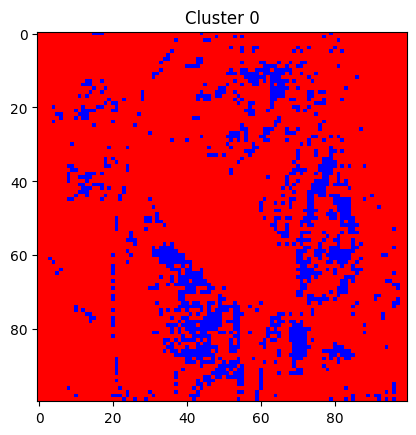

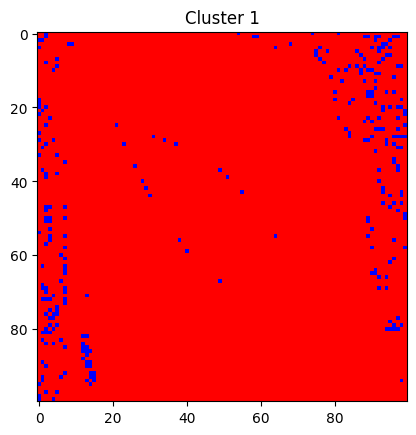

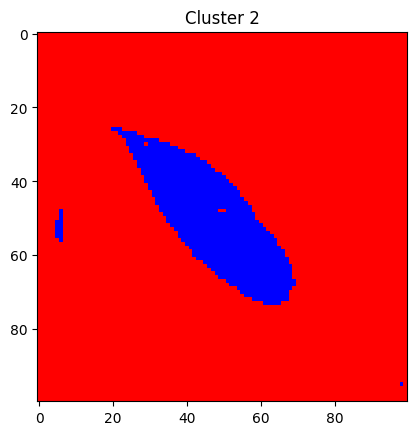

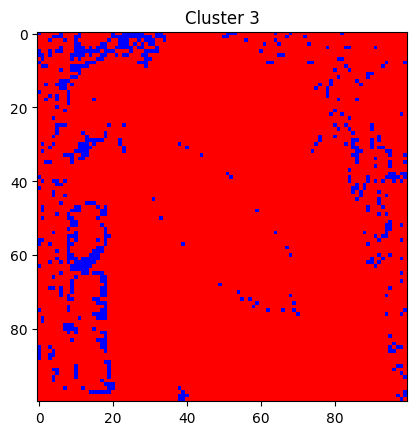

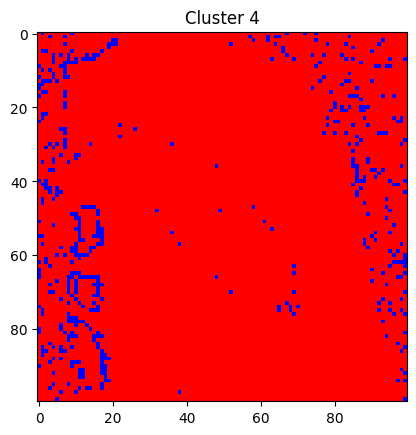

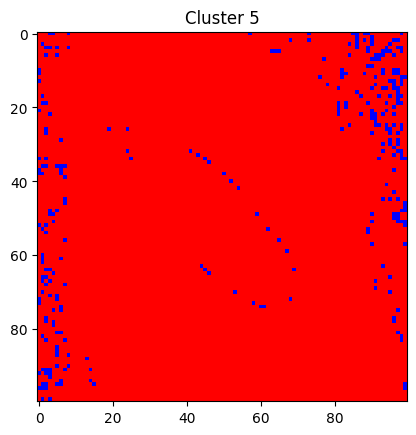

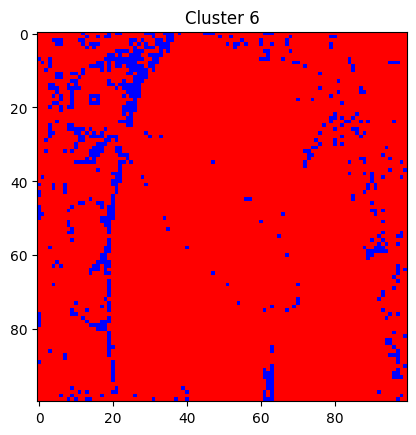

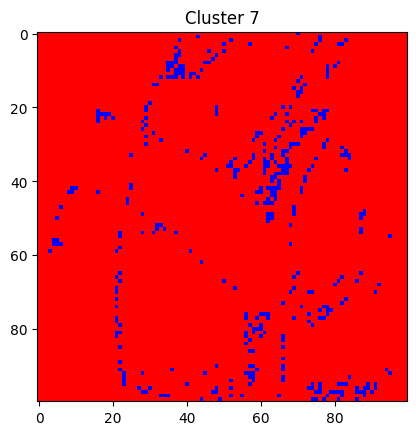

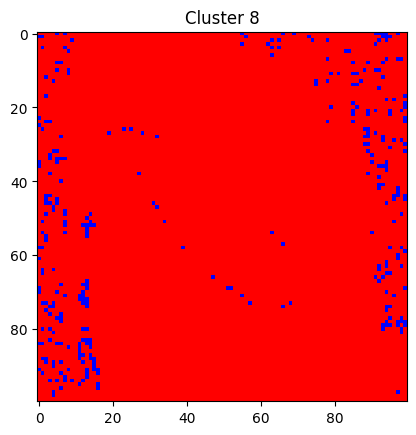

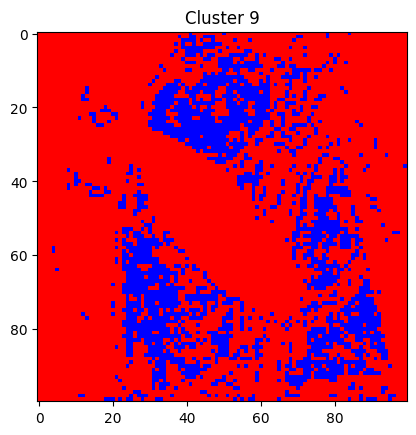

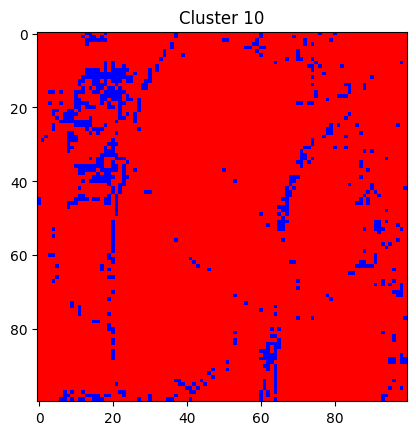

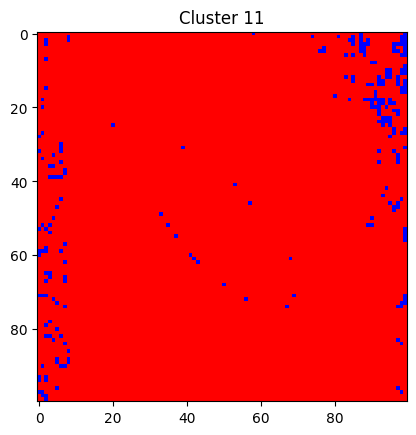

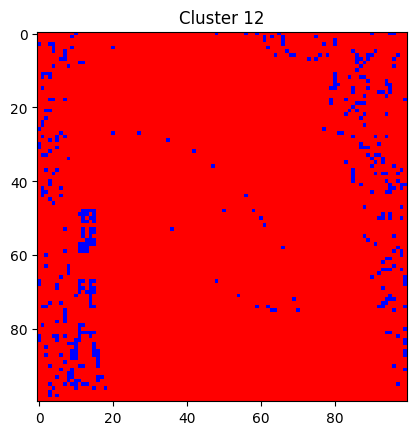

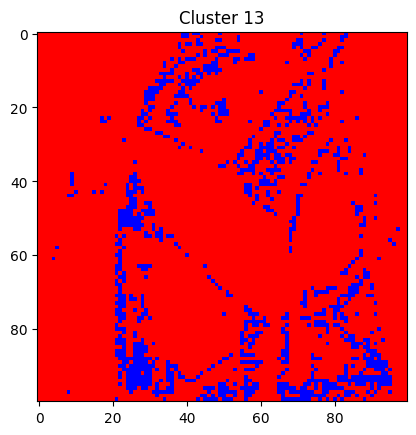

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from scipy.linalg import eigh

# Step 1: Load the image and convert to grayscale
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if image is None:
        raise ValueError("Image not found or unable to load!")
    return gray_image

# Step 2: Create a similarity graph
def create_similarity_graph(image, n_neighbors=10):
    height, width = image.shape
    # Flatten the image to convert it into an array of pixels
    pixels = image.flatten().reshape(-1, 1)

    # Create a graph where each pixel is connected to its n_neighbors
    graph = kneighbors_graph(pixels, n_neighbors=n_neighbors, include_self=True)
    return graph.toarray()

# Step 3: Compute the Laplacian matrix
def compute_laplacian(graph):
    # Degree matrix (diagonal matrix)
    degree_matrix = np.diag(np.sum(graph, axis=1))
    # Laplacian matrix: L = D - A
    laplacian = degree_matrix - graph
    return laplacian

# Step 4: Compute eigenvalues and apply eigenvalue gap heuristic
def eigenvalue_gap_heuristic(laplacian, n_largest=25):
    # Compute the eigenvalues
    eigenvalues, _ = eigh(laplacian, eigvals=(1, n_largest - 1))

    # Plot eigenvalues to visually inspect the gap
    plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')
    plt.show()

    # Find the largest gap between consecutive eigenvalues
    gaps = np.diff(eigenvalues)
    optimal_clusters = np.argmax(gaps)+2 # The index with the largest gap
    print(f"Optimal number of clusters determined by the Eigenvalue Gap Heuristic: {optimal_clusters}")
    print(gaps)
    return optimal_clusters


# Main function to run the heuristic
def thermal_clustering_with_eigenvalue_gap(image_path):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)

    # Create a similarity graph
    graph = create_similarity_graph(image)

    # Compute the Laplacian matrix
    laplacian = compute_laplacian(graph)

    # Determine optimal number of clusters using the Eigenvalue Gap Heuristic
    k = eigenvalue_gap_heuristic(laplacian)

    flat_image = image.flatten().reshape(-1, 1)

    kmeans = KMeans(n_clusters=k)

    kmeans.fit(flat_image)
    best_labels = kmeans.labels_
    clustered_image = best_labels.reshape(image.shape)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100))

    for i in range(k):
      cluster_mask = (clustered_image == i).astype(np.uint8) * 255

      cluster_viz = np.zeros_like(image)
      cluster_viz[..., 0] = cluster_mask
      cluster_viz[..., 2] = 255 - cluster_mask

      plt.imshow(cv2.cvtColor(cluster_viz, cv2.COLOR_BGR2RGB))
      plt.title(f'Cluster {i}')
      plt.show()


# Example usage:
image_path = '/content/IR_01379.jpg'  # Path to your thermal image
thermal_clustering_with_eigenvalue_gap(image_path)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Build an autoencoder
def build_autoencoder(input_img, encoding_dim):
    input_dim=input_img.shape
    # Encoding
    encoded = Dense(encoding_dim, activation='relu')(input_img)

    # Decoding
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)  # Separate model for the encoder

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder, encoder

# Step 2: Train the autoencoder
def train_autoencoder(autoencoder, data, epochs=50, batch_size=32):
    autoencoder.fit(data, data, epochs=epochs, batch_size=batch_size, shuffle=True)

# Step 3: Apply clustering on the latent space
def cluster_in_latent_space(encoder, data, n_clusters):
    encoded_data = encoder.predict(data)

    # Apply KMeans or other clustering algorithms to latent space
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(encoded_data)

    return labels

image_path = '/content/IR_01387.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))
auto,enc=build_autoencoder(image)
train_autoencoder(auto,image)
cluster_in_latent_space(enc,image,2)

In [ ]:
!pip install numpy scipy scikit-learn matplotlib

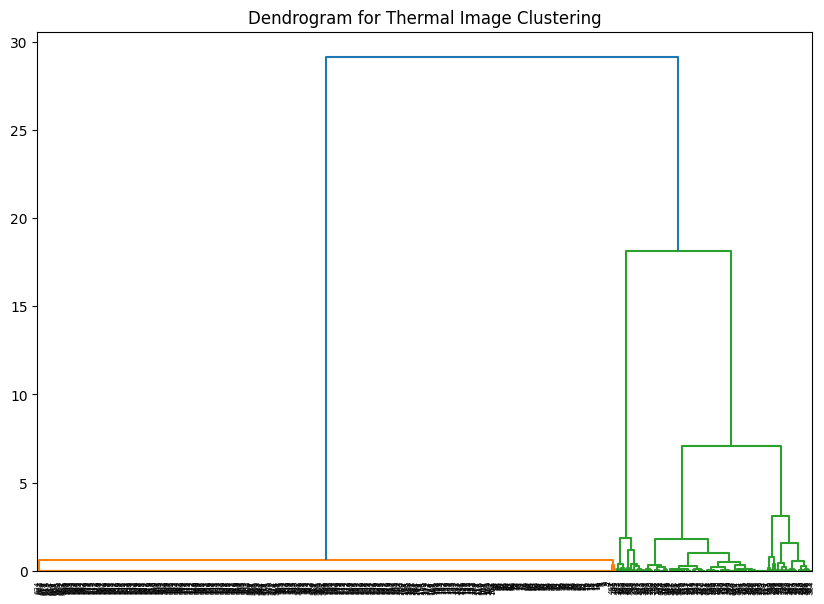

Optimal number of clusters based on dendrogram inconsistency: 71


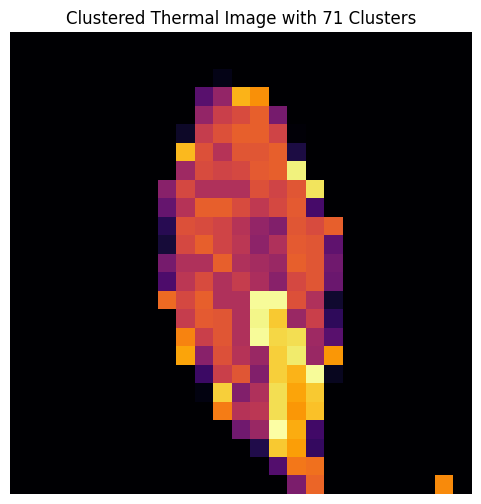

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import inconsistent

# Step 1: Load and preprocess the thermal image
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (25, 25))
    if image is None:
        raise ValueError("Image not found or unable to load!")
    normalized_image = image / 255.0
    pixels = normalized_image.reshape(-1, 1)
    return pixels, image.shape

# Step 2: Perform Agglomerative Hierarchical Clustering
def hierarchical_clustering(pixels):
    # Standardize the data
    scaler = StandardScaler()
    pixels_scaled = scaler.fit_transform(pixels)

    # Compute the linkage matrix
    Z = linkage(pixels_scaled, method='ward')

    # Plot the dendrogram to visualize the hierarchy
    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram for Thermal Image Clustering")
    dendrogram(Z)
    plt.show()

    return Z

# Step 3: Automatically find the optimal number of clusters
def find_optimal_clusters_inconsistent(Z):
    # Use inconsistent method to find clusters based on hierarchy
    incons = inconsistent(Z)

    # Find the first large inconsistency, which suggests where to cut the tree
    threshold = 1.5 * np.median(incons[:, 3])  # Use a multiple of the inconsistency metric

    # Cut the dendrogram where the inconsistency is large
    cluster_labels = fcluster(Z, threshold, criterion='distance')

    num_clusters = len(np.unique(cluster_labels))
    print(f"Optimal number of clusters based on dendrogram inconsistency: {num_clusters}")

    return cluster_labels

# Step 4: Plot the clustered image
def plot_clustered_image(cluster_labels, original_shape):
    # Reshape the clustered pixels back to the original image dimensions
    clustered_image = cluster_labels.reshape(original_shape)

    # Plot the clustered image
    plt.figure(figsize=(6, 6))
    plt.title(f'Clustered Thermal Image with {len(np.unique(cluster_labels))} Clusters')
    plt.imshow(clustered_image, cmap='inferno')
    plt.axis('off')
    plt.show()

# Main function to run the process
if __name__ == "__main__":
    # Path to the thermal image
    image_path = '/content/IR_01387.jpg'

    # Load and preprocess the thermal image
    pixels, image_shape = load_and_preprocess_image(image_path)

    # Perform Agglomerative Hierarchical Clustering
    Z = hierarchical_clustering(pixels)

    # Automatically determine the optimal number of clusters based on inconsistency
    optimal_clusters = find_optimal_clusters_inconsistent(Z)

    # Plot the clustered thermal image
    plot_clustered_image(optimal_clusters, image_shape)


Number of components chosen: 2
Number of components chosen: 2


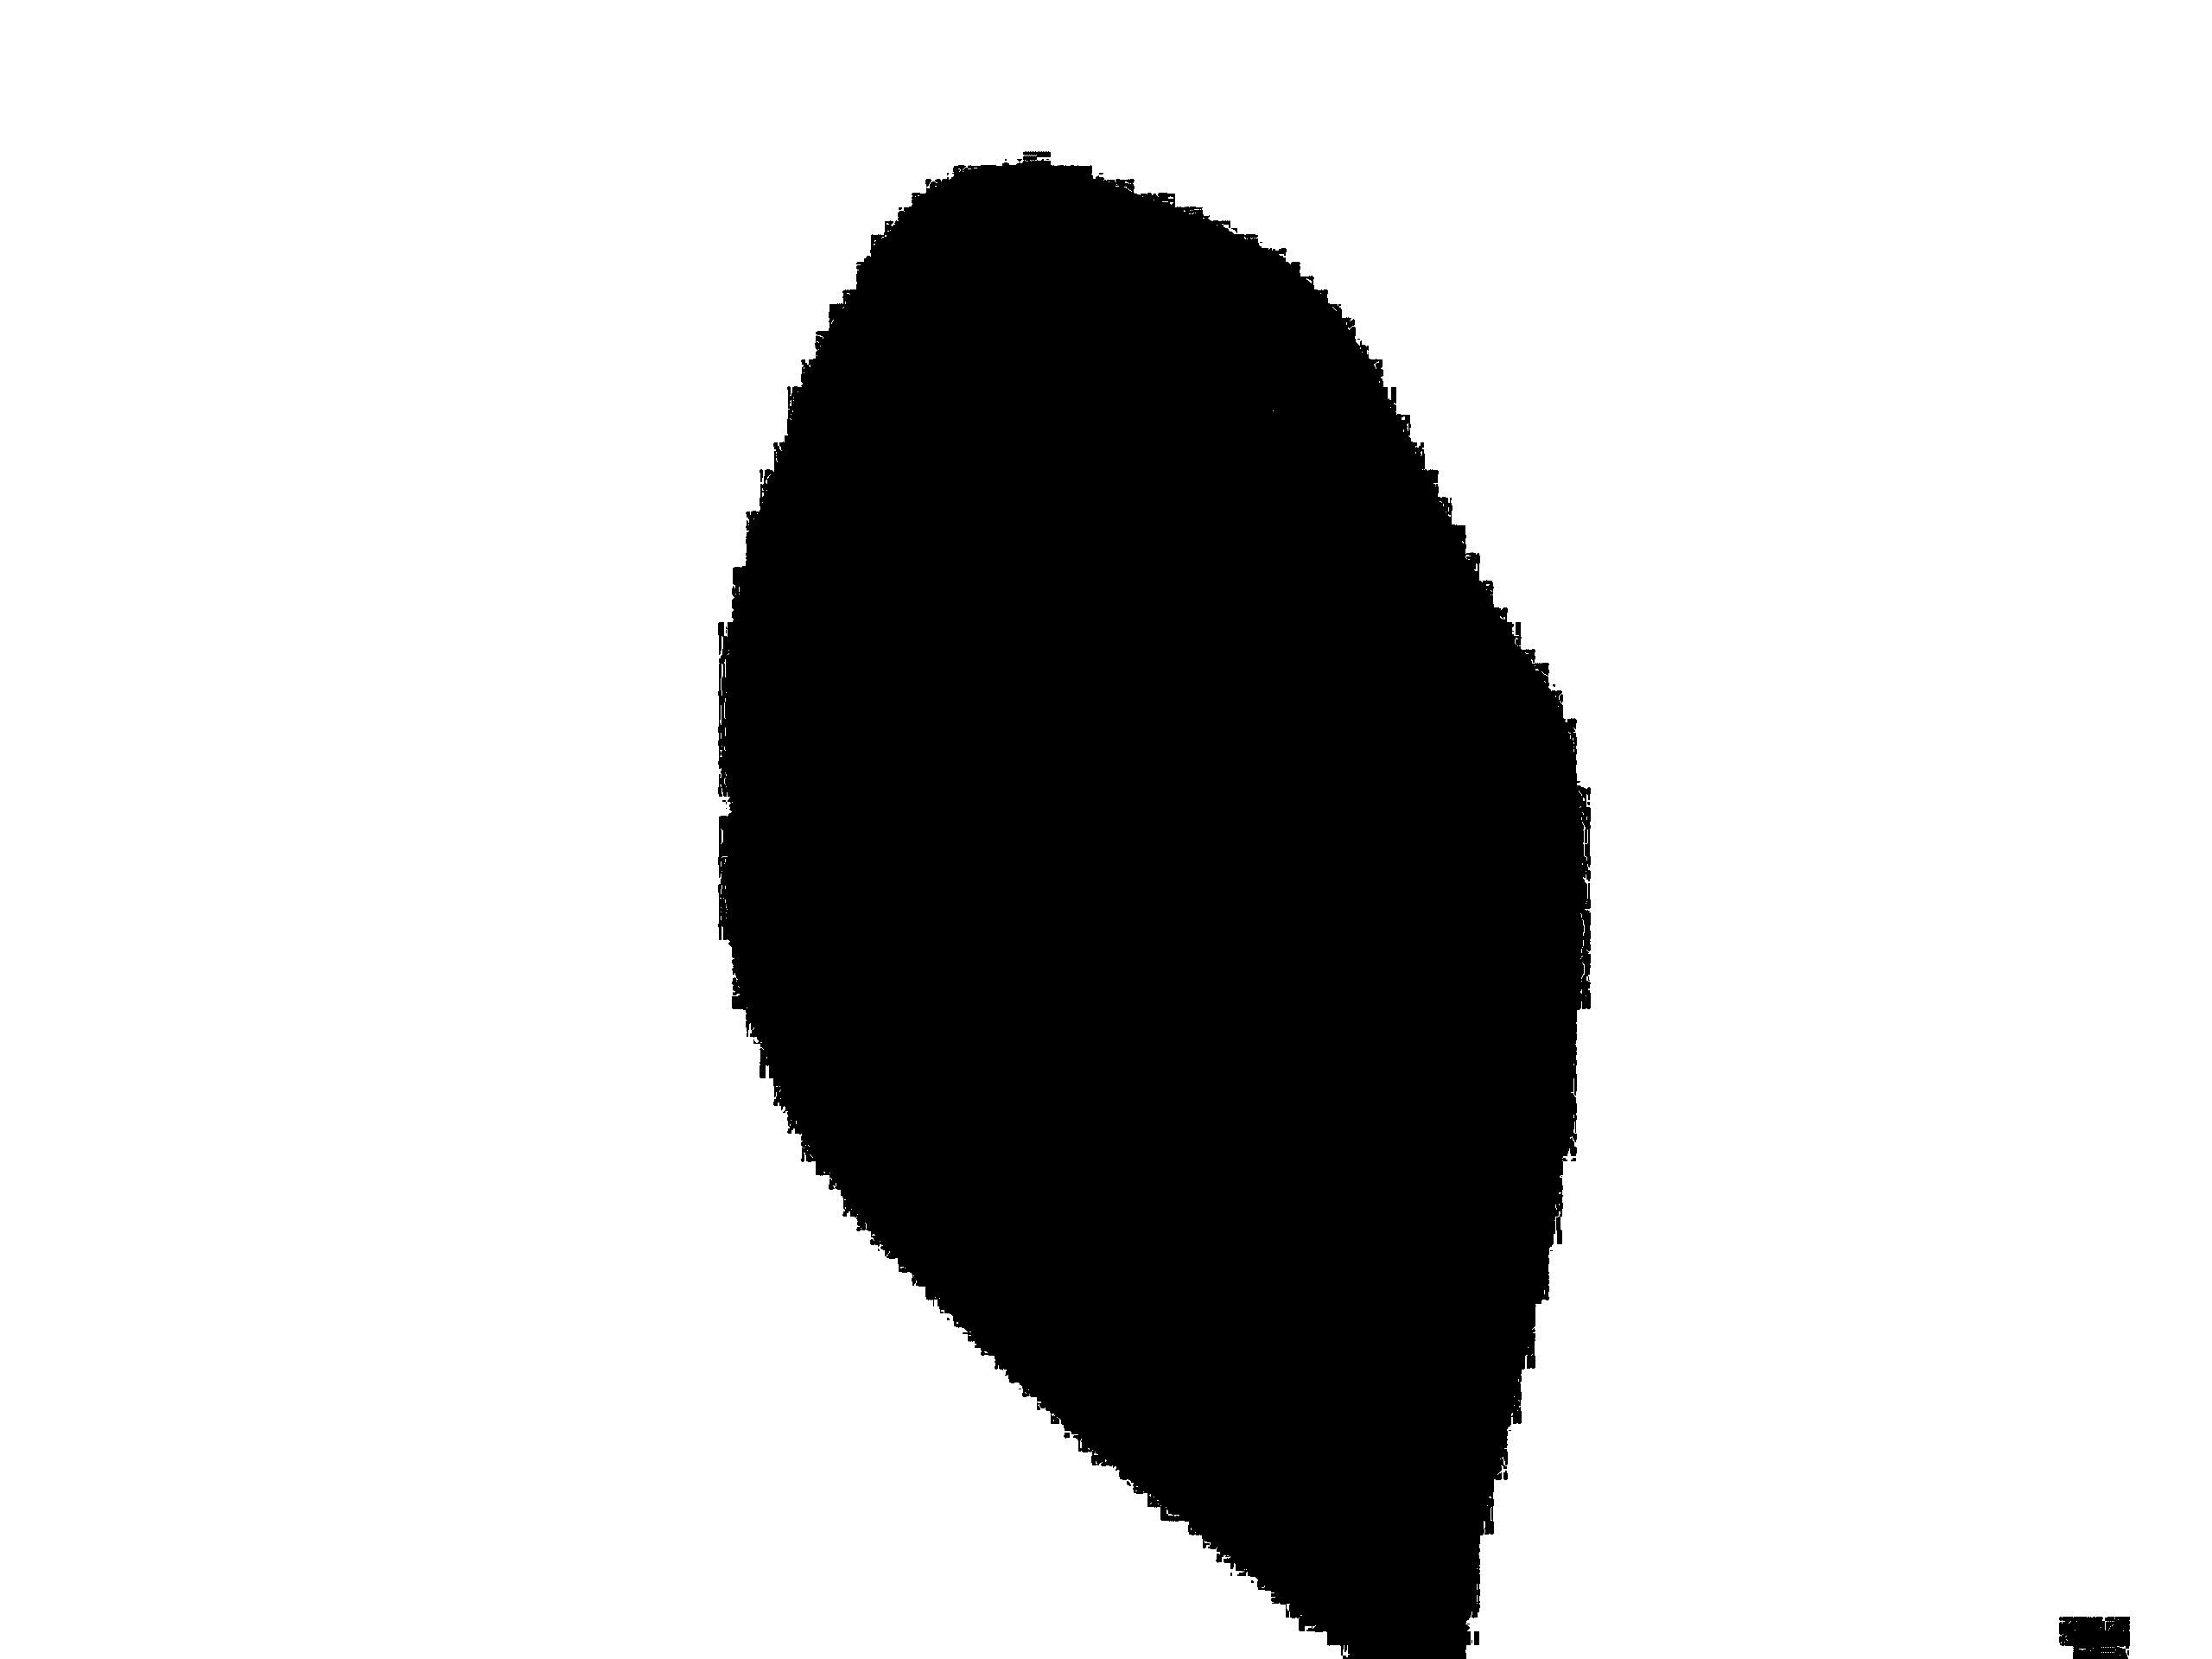

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA

def pixel_purity_index(image, method='mle', variance_threshold=0.95):
    # Reshape the image to a 2D array of pixels and colors (R, G, B)
    pixels = image.reshape(-1, 3)

    pca = PCA(n_components='mle')

    # Fit PCA on the pixels and transform
    pca_pixels = pca.fit_transform(pixels)
    print(f"Number of components chosen: {pca.n_components_}")

    # Find the purest pixels based on extreme projections in the PCA space
    min_proj, max_proj = np.min(pca_pixels, axis=0), np.max(pca_pixels, axis=0)

    # Identify pixels that are near the extremes (purest)
    pure_pixels = np.any((pca_pixels == min_proj) | (pca_pixels == max_proj), axis=1)

    # Reshape to image dimensions to create a mask of pure pixels
    purity_mask = pure_pixels.reshape(image.shape[:2])
    return purity_mask

# Load your image
image = cv2.imread('/content/IR_01387.jpg')

# Using MLE method
purity_mask_mle = pixel_purity_index(image, method='mle')

# Using variance threshold method (e.g., 95% variance)
purity_mask_variance = pixel_purity_index(image, method='variance', variance_threshold=0.95)

# Display results
cv2_imshow(purity_mask_mle.astype(np.uint8) * 255)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of components chosen: 2
Number of components chosen: 2


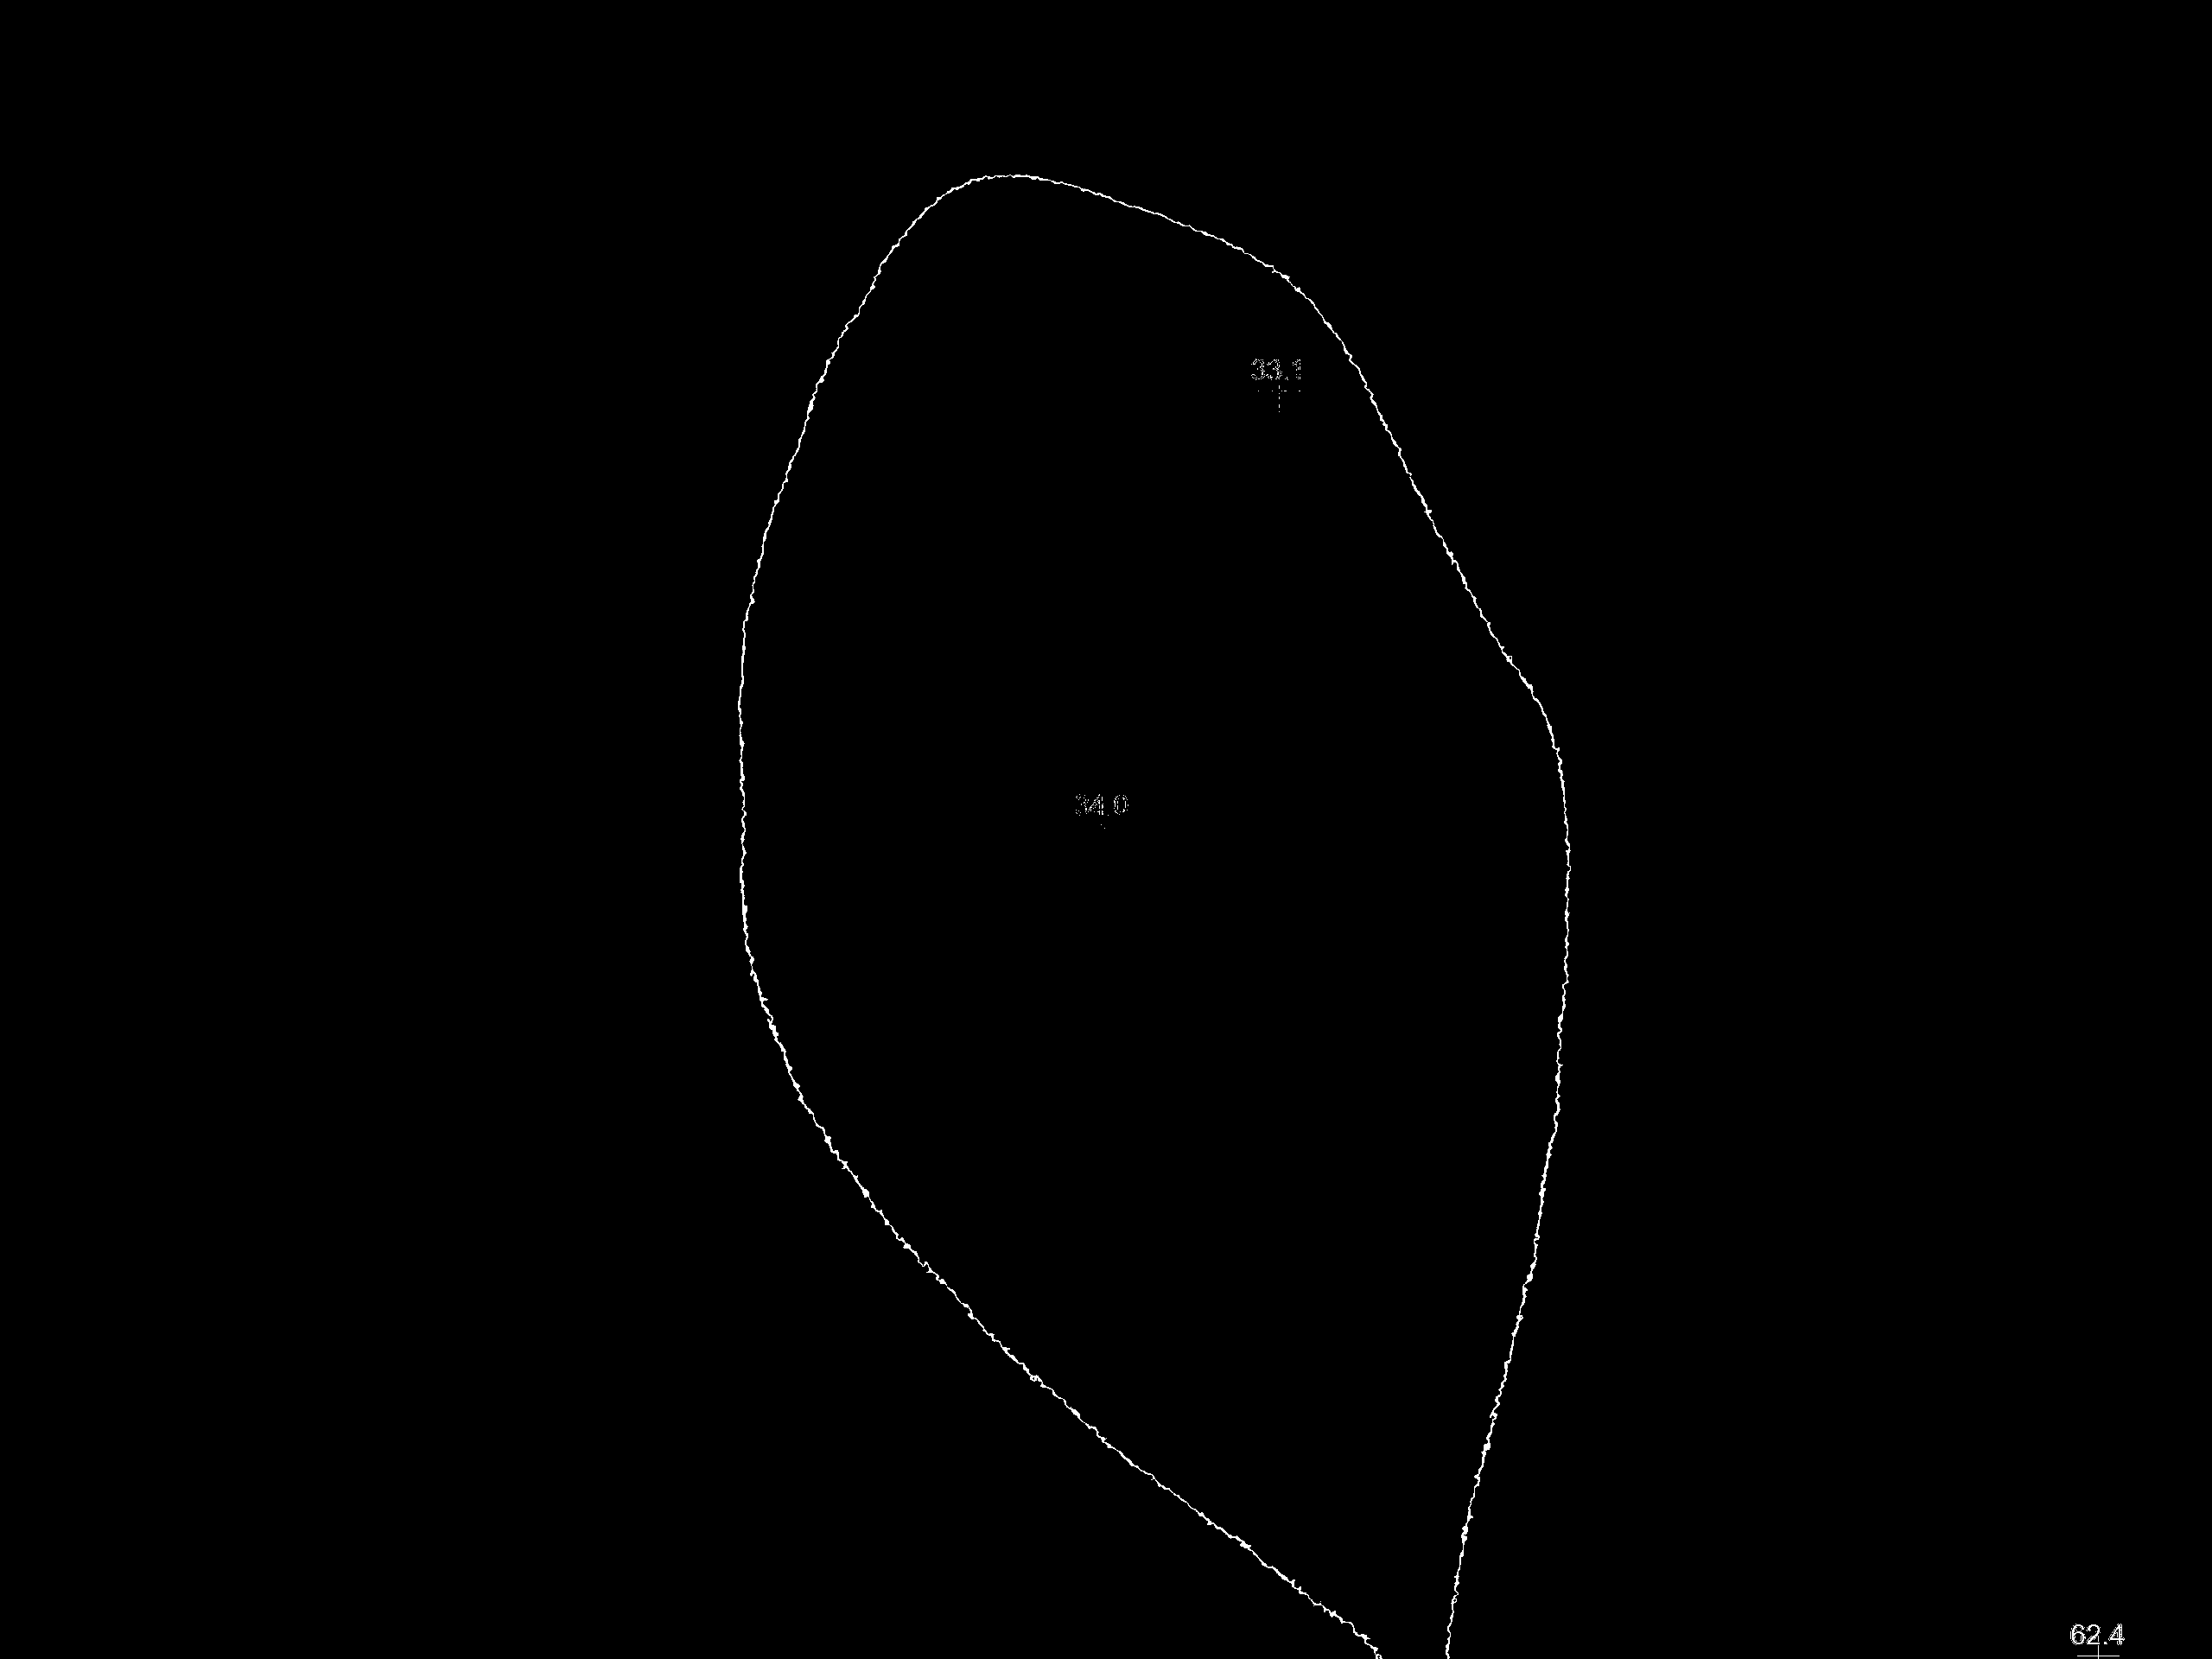

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA

def mixed_pixel_index(image, method='mle', variance_threshold=0.95):
    # Reshape the image to a 2D array of pixels and colors (R, G, B)
    pixels = image.reshape(-1, 3)


    pca = PCA(n_components='mle')

    # Fit PCA on the pixels and transform
    pca_pixels = pca.fit_transform(pixels)
    print(f"Number of components chosen: {pca.n_components_}")

    # Calculate the min and max projections in each principal component
    min_proj, max_proj = np.min(pca_pixels, axis=0), np.max(pca_pixels, axis=0)

    # Define a threshold for "mixed" pixels based on their distance from the extremes
    # Mixed pixels will be those in the middle range of the projections, not at min or max
    lower_bound = min_proj + 0.25 * (max_proj - min_proj)
    upper_bound = max_proj - 0.25 * (max_proj - min_proj)

    # Find pixels within the bounds (considered mixed)
    mixed_pixels = np.all((pca_pixels > lower_bound) & (pca_pixels < upper_bound), axis=1)

    # Reshape back to image dimensions to create a mask of mixed pixels
    mixed_pixel_mask = mixed_pixels.reshape(image.shape[:2])
    return mixed_pixel_mask

# Load your image
image = cv2.imread('/content/IR_01387.jpg')

# Using MLE method
mixed_pixel_mask_mle = mixed_pixel_index(image, method='mle')

# Using variance threshold method (e.g., 95% variance)
mixed_pixel_mask_variance = mixed_pixel_index(image, method='variance', variance_threshold=0.95)

# Display results
cv2_imshow(mixed_pixel_mask_mle.astype(np.uint8) * 255)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
from glob import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Load images
class_folder = '/content/UntitledFolder'
images = []

image_files = glob(class_folder + '/*.jpg')
for image_file in image_files:
    img = cv2.imread(image_file)
    img = cv2.resize(img, (256, 256))
    images.append(img)

# Convert lists to numpy arrays and normalize
images = np.array(images).astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)

# Autoencoder architecture
def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Instantiate and train the autoencoder
autoencoder = build_autoencoder(images[0].shape)
autoencoder.summary()

# Train autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=8, validation_split=0.2)

x_train shape: (107, 256, 256, 3)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 128, 128, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 64, 64, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 32, 32, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 32, 32, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_33 (UpSampling2D)      │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 64, 64, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_34 (UpSampling2D)      │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 128, 128, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_35 (UpSampling2D)      │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 256, 256, 3)         │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 985ms/step - loss: 0.1753 - val_loss: 0.1683
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.1361 - val_loss: 0.1106
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 914ms/step - loss: 0.0698 - val_loss: 0.0695
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 802ms/step - loss: 0.0447 - val_loss: 0.0553
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0304 - val_loss: 0.0444
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 937ms/step - loss: 0.0211 - val_loss: 0.0415
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 847ms/step - loss: 0.0193 - val_loss: 0.0393
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 990ms/step - loss: 0.0166 - val_loss: 0.0384
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 992ms/step - loss: 0.0156 - val_loss: 0.0368
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 986ms/step - loss: 0.0131 - val_loss: 0.0358
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 982ms/step - loss: 0.0127 - val_loss: 0.0351
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 999m

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


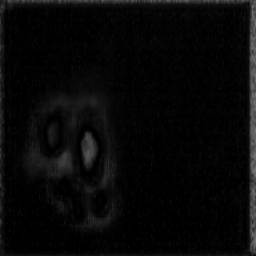

In [ ]:
from google.colab.patches import cv2_imshow
test_image = cv2.imread('/content/Image_1.jpg')
test_image_resized = cv2.resize(test_image, (256, 256)) / 255.0
test_image_resized = np.expand_dims(test_image_resized, axis=0)

# Reconstruct and calculate the error map
reconstructed = autoencoder.predict(test_image_resized)
error_map = np.mean((reconstructed - test_image_resized) ** 2, axis=-1).squeeze()

# Display reconstruction error
cv2_imshow((error_map * 255).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


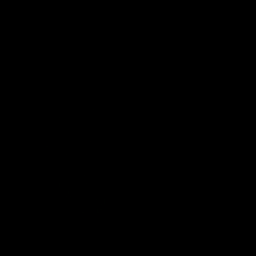

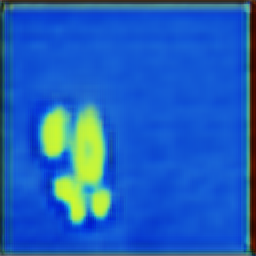

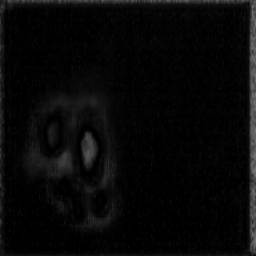

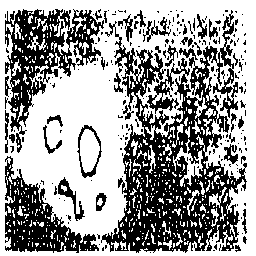

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming you have already trained your autoencoder and have it loaded
# and you have your test_image ready

# Predict reconstruction for the test image
reconstructed = autoencoder.predict(test_image_resized)

# Calculate the reconstruction error (Mean Squared Error)
reconstruction_error = np.mean((reconstructed - test_image_resized) ** 2, axis=-1).squeeze()

# Set a threshold for mixed pixels
threshold = 0.01  # Adjust this value based on your observations

# Create a mask for mixed pixels
mixed_pixel_mask = reconstruction_error > threshold

# Visualize the results
cv2_imshow(test_image_resized[0])
cv2_imshow((reconstructed[0] * 255).astype(np.uint8))
cv2_imshow((reconstruction_error * 255).astype(np.uint8))
cv2_imshow((mixed_pixel_mask.astype(np.uint8) * 255))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
from glob import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load images
class_folder = '/content/drive/MyDrive/Thermal images/JPG'
images = []

image_files = glob(class_folder + '/*.jpg')
for image_file in image_files:
    img = cv2.imread(image_file)
    img = cv2.resize(img, (640, 480))
    images.append(img)

# Convert lists to numpy arrays and normalize
images = np.array(images).astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)

# Autoencoder architecture
def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Instantiate and train the autoencoder
autoencoder = build_autoencoder(images[0].shape)
autoencoder.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
X_train, X_val = train_test_split(images, test_size=0.3)
X_val, X_test = train_test_split(X_val, test_size=0.3)
# Train autoencoder
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=8,
                validation_data=(X_val, X_val),
                callbacks=[early_stopping])

x_train shape: (131, 480, 640, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 480, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 480, 640, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 240, 320, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 240, 320, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 120, 160, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 120, 160, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 80, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 80, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 120, 160, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 120, 160, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 240, 320, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 240, 320, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 480, 640, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 480, 640, 3)         │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 663ms/step - loss: 0.1614 - val_loss: 0.1532
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.1440 - val_loss: 0.1197
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0982 - val_loss: 0.0738
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0520 - val_loss: 0.0365
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.0299 - val_loss: 0.0246
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0206 - val_loss: 0.0218
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0184 - val_loss: 0.0211
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0162 - val_loss: 0.0198
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0175 - val_loss: 0.0196
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0143 - val_loss: 0.0197
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0153 - val_loss: 0.0180
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms

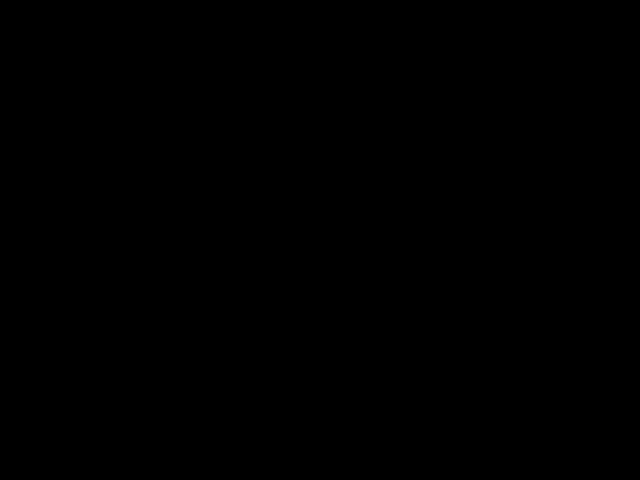

In [ ]:
cv2_imshow(X_test[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


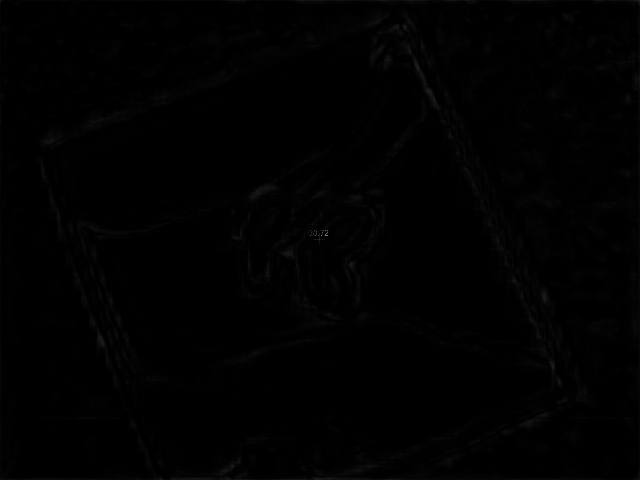

In [ ]:
from google.colab.patches import cv2_imshow
test_image = cv2.imread('/content/drive/MyDrive/Thermal images/JPG/IR_01459.jpg')
test_image_resized = cv2.resize(test_image, (640, 480)) / 255.0
test_image_resized = np.expand_dims(test_image_resized, axis=0)

# Reconstruct and calculate the error map
reconstructed = autoencoder.predict(test_image_resized)
error_map = np.mean((reconstructed - test_image_resized) ** 2, axis=-1).squeeze()

# Display reconstruction error
cv2_imshow((error_map * 255).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


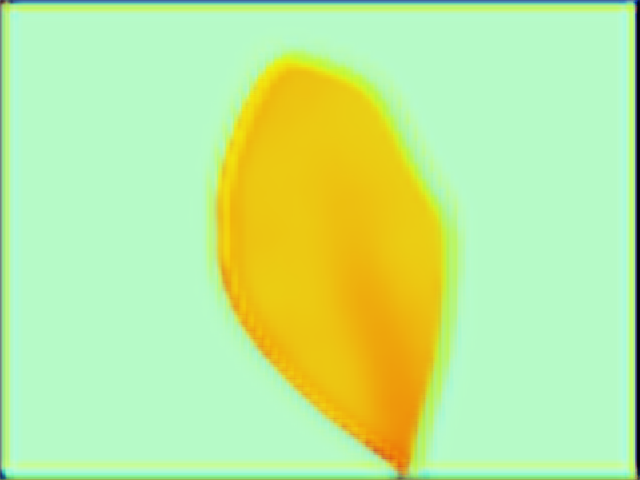

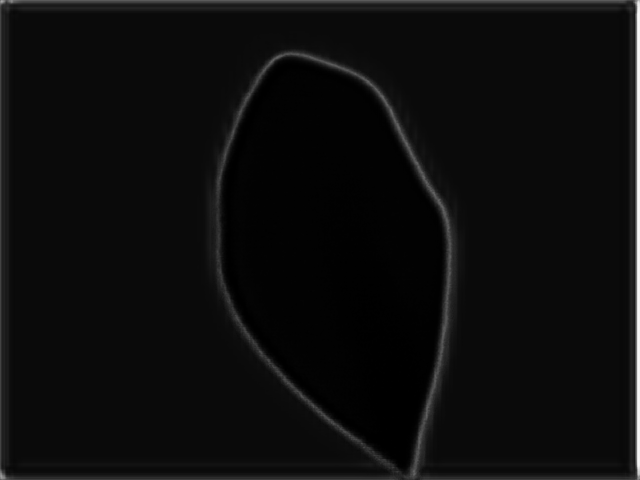

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming you have already trained your autoencoder and have it loaded
# and you have your test_image ready

# Predict reconstruction for the test image
reconstructed = autoencoder.predict(test_image_resized)

# Calculate the reconstruction error (Mean Squared Error)
reconstruction_error = np.mean((reconstructed - test_image_resized) ** 2, axis=-1).squeeze()

# Set a threshold for mixed pixels
threshold = 0.01  # Adjust this value based on your observations

# Create a mask for mixed pixels
mixed_pixel_mask = reconstruction_error > threshold


cv2_imshow((reconstructed[0] * 255).astype(np.uint8))
cv2_imshow((reconstruction_error * 255).astype(np.uint8))
#cv2_imshow((mixed_pixel_mask.astype(np.uint8) * 255))
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step


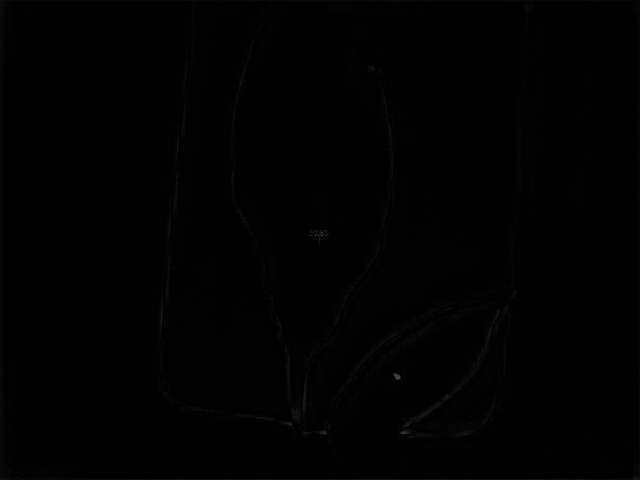

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


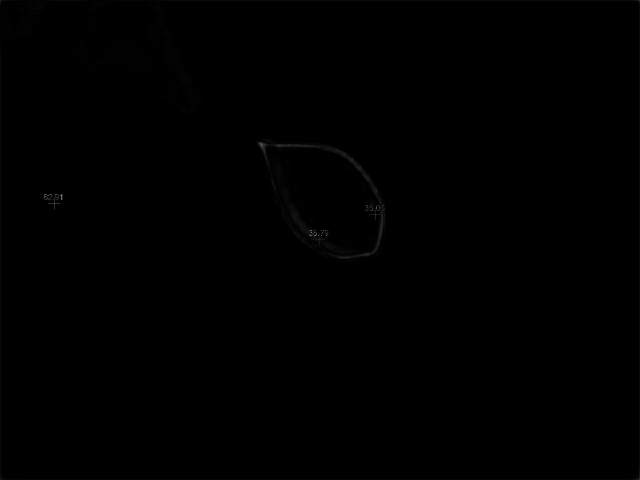

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


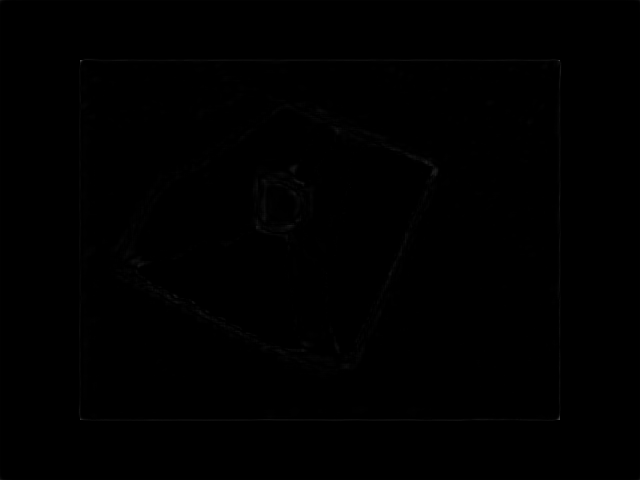

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


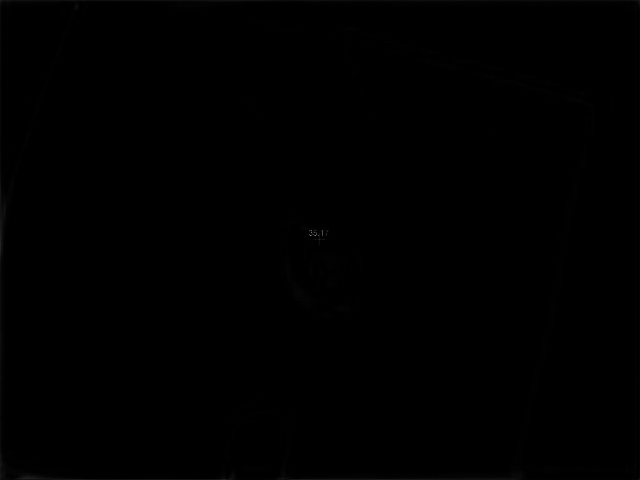

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


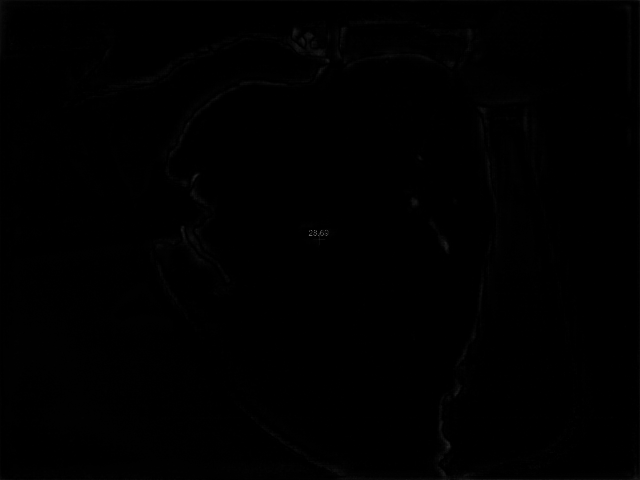

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


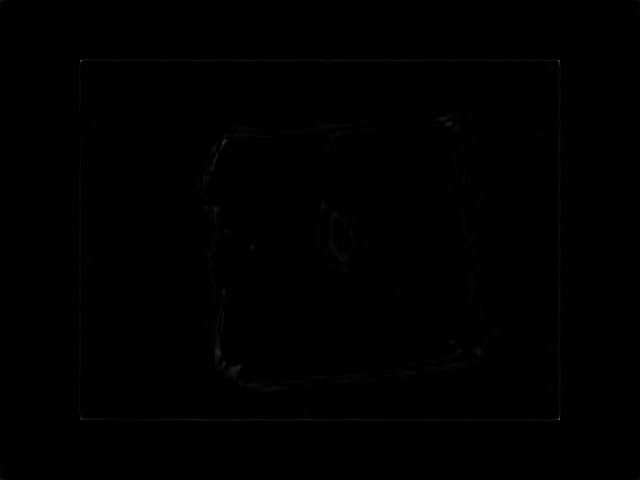

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


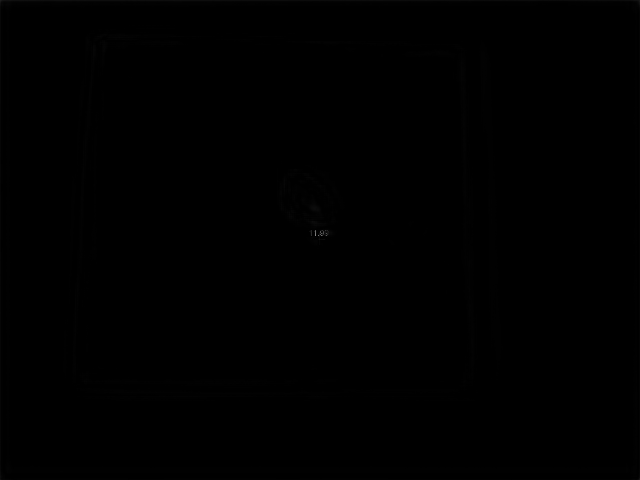

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


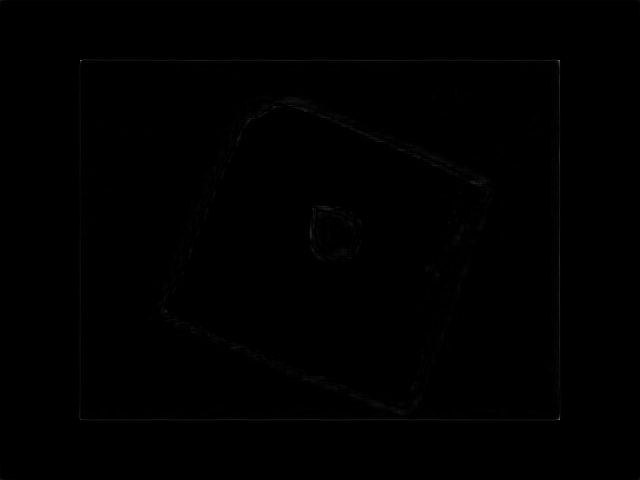

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


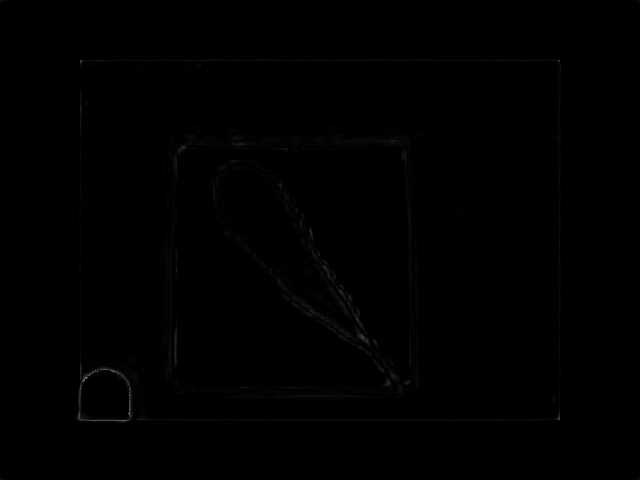

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


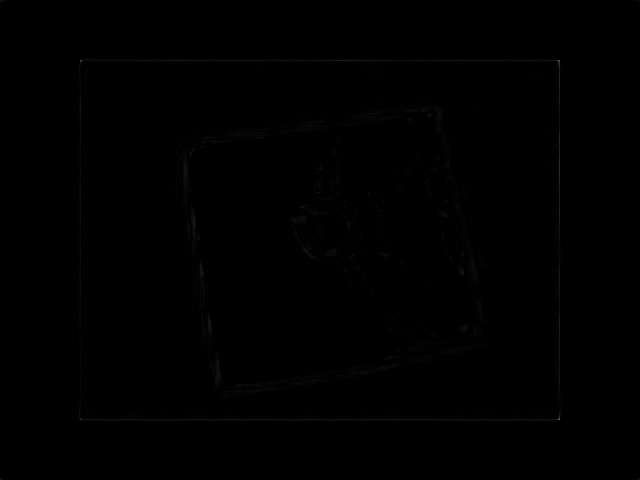

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


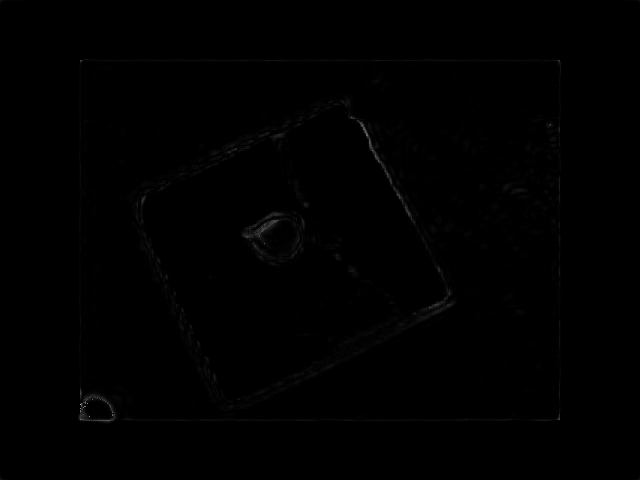

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


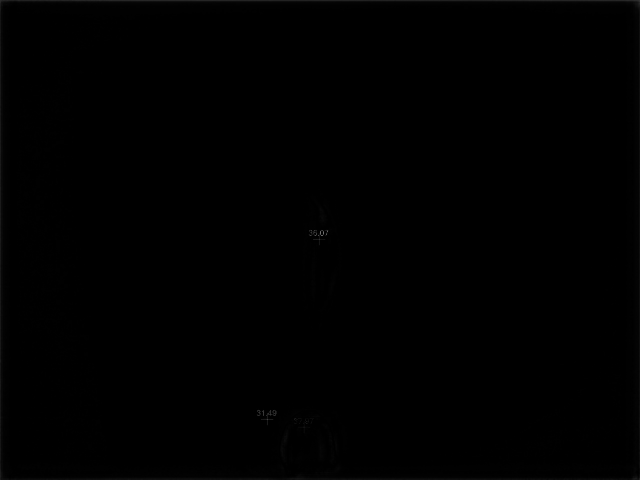

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [ ]:
from google.colab.patches import cv2_imshow
for i in X_test:
  test_image = i
  test_image_resized = np.expand_dims(test_image, axis=0)

  reconstructed = autoencoder.predict(test_image_resized)

  # Calculate the reconstruction error (Mean Squared Error)
  reconstruction_error = np.mean((reconstructed - test_image_resized) ** 2, axis=-1).squeeze()
  # Set a threshold for mixed pixels
  threshold = 0.01  # Adjust this value based on your observations
  # Create a mask for mixed pixels
  mixed_pixel_mask = reconstruction_error > threshold
  cv2_imshow((reconstruction_error * 255).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from tensorflow.keras.models import Model

autoencoder.save("/content/drive/MyDrive/Models/autoencoder_model.h5")


In [ ]:
import numpy as np
import cv2
from keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from glob import glob

# Load the pre-trained autoencoder model
autoencoder = load_model('/content/drive/MyDrive/Models/autoencoder_model.h5',
                         custom_objects={'mse': MeanSquaredError()})  # Ensure the mse loss is recognized

# Load your images and preprocess as before
class_folder = '/content/drive/MyDrive/Thermal images/JPG'
images = []
image_files = glob(class_folder + '/*.jpg')
for image_file in image_files:
    img = cv2.imread(image_file)
    img = cv2.resize(img, (640, 480))  # Adjust to match your model's input size
    images.append(img)

# Convert lists to numpy arrays and normalize

images = np.array(images).astype('float32') / 255.0
print(images.shape)
X_train, X_val = train_test_split(images, test_size=0.3)
X_val, X_test = train_test_split(X_val, test_size=0.3)

# Make predictions on the test set
reconstructed_images = autoencoder.predict(X_test)

# Function to calculate reconstruction error (MSE)
def calculate_reconstruction_error(original, reconstructed):
    return np.mean((original - reconstructed) ** 2, axis=-1)

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Threshold for mixed pixels (You can adjust this based on your dataset)
threshold = 0.01  # Example threshold for detecting mixed pixels

# Simulate or create ground truth labels (binary masks for mixed pixels)
# Here, we're just simulating ground truth for the sake of illustration.
# In reality, you should have an actual binary mask that marks mixed pixels.
for i in range(len(X_test)):
    test_image = X_test[i]
    test_image_resized = np.expand_dims(test_image, axis=0)

    reconstructed = reconstructed_images[i]

    # Calculate the reconstruction error (MSE)
    reconstruction_error = calculate_reconstruction_error(test_image_resized, reconstructed)

    # Create a mixed pixel mask based on the threshold
    mixed_pixel_mask = reconstruction_error > 0.01  # 1 for mixed pixels, 0 for non-mixed pixels

    # Simulate ground truth (just for illustration)
    # For a real dataset, y_true_mask would be the actual ground truth binary mask
    y_true_mask = (reconstruction_error > 0.008).astype(int)  # Example of synthetic ground truth mask

    # Flatten both the predicted and ground truth masks for compatibility
    y_true.append(y_true_mask.flatten())  # Flatten the mask to match y_pred shape
    y_pred.append(mixed_pixel_mask.flatten())  # Flatten for compatibility

# Convert lists to numpy arrays
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Calculate evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
pr_auc = average_precision_score(y_true, y_pred)

# Print the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')

# Optionally, you can visualize the reconstruction error
# Visualize the reconstruction error (scaled for visibility)
for i in range(5):  # Display the first 5 test images and their reconstruction error
    test_image = X_test[i]
    test_image_resized = np.expand_dims(test_image, axis=0)

    reconstructed = reconstructed_images[i]
    reconstruction_error = calculate_reconstruction_error(test_image_resized, reconstructed)

    # Visualize the reconstruction error (scaled for visibility)
    cv2_imshow((reconstruction_error * 255).astype(np.uint8))  # Rescale to 0-255 for visualization



(131, 480, 640, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Precision: 1.0000
Recall: 0.8123
F1-Score: 0.8964
ROC AUC: 0.9061
PR AUC: 0.8258


In [ ]:
def calculate_Nmembers(reshaped_reconstructed, reconstructed_image):
    best_score = -1
    best_k = 2
    best_labels = None
    best_kmeans = None

    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(reshaped_reconstructed)

        # Silhouette score requires 1D labels
        score = silhouette_score(reshaped_reconstructed, kmeans.labels_)
        print(f'For n_clusters = {k}, the Silhouette Score is {score}')

        if score > best_score:
            best_score = score
            best_k = k
            best_labels = kmeans.labels_.reshape(reconstructed_image.shape[:2])  # Reshape after scoring
            best_kmeans = kmeans

    return best_kmeans, best_k, best_labels



In [ ]:
# Function to calculate mixed pixels and their composition
def analyze_mixed_pixels(test_image, reconstructed_image, threshold=0.01):
    error_map = np.mean((reconstructed_image - test_image) ** 2, axis=-1)

    # Identify mixed pixels
    mixed_pixel_mask = error_map > threshold
    mixed_pixel_percentage = np.sum(mixed_pixel_mask) / error_map.size * 100

    error_map = np.mean((reconstructed_image - test_image) ** 2, axis=-1).squeeze()
    # Determine object composition using clustering
    #reshaped_reconstructed = reconstructed_image.reshape(-1, 3)  # Flatten to RGB vectors
    #kmeans, n_clusters, cluster_labels = calculate_Nmembers(reshaped_reconstructed, reconstructed_image)

    #object_composition = {}
    #for cluster_id in range(kmeans.n_clusters):
        #cluster_percentage = (
         #   np.sum(cluster_labels[mixed_pixel_mask] == cluster_id) / np.sum(mixed_pixel_mask) * 100
      #  )
      #  object_composition[f'Object_{cluster_id}'] = cluster_percentage

    return error_map,mixed_pixel_percentage#, object_composition, error_map




In [ ]:
# Evaluate the autoencoder
def evaluate_autoencoder(test_images, reconstructed_images):
    mse = np.mean((test_images - reconstructed_images) ** 2)

    # Ensure win_size is appropriate for all images
    avg_ssim = 0
    for i in range(len(test_images)):
        img_shape = test_images[i].shape[:2]  # Get height and width
        min_dim = min(img_shape)
        win_size = min(5, min_dim // 2 * 2 - 1)  # Ensure win_size is odd and fits image
        avg_ssim += ssim(
            test_images[i],
            reconstructed_images[i],
            channel_axis=-1,  # Specify channel axis
            win_size=win_size,
            data_range=1.0  # Specify data range for normalized images
        )
    avg_ssim /= len(test_images)

    return mse, avg_ssim


In [ ]:
import cv2
from glob import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load images
class_folder = '/content/drive/MyDrive/Thermal images/JPG'
images = []

image_files = glob(class_folder + '/*.jpg')
for image_file in image_files:
    img = cv2.imread(image_file)
    img = cv2.resize(img, (640, 480))
    images.append(img)

# Convert lists to numpy arrays and normalize
images = np.array(images).astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)

# Autoencoder architecture
def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Instantiate and train the autoencoder
autoencoder = build_autoencoder(images[0].shape)
autoencoder.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

X_train, X_val = train_test_split(images, test_size=0.3)
X_val, X_test = train_test_split(X_val, test_size=0.3)

# Train autoencoder
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=8,
                validation_data=(X_val, X_val),
                callbacks=[early_stopping])




x_train shape: (131, 480, 640, 3)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 480, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 480, 640, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 240, 320, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 240, 320, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 120, 160, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 120, 160, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 60, 80, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 60, 80, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 120, 160, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 120, 160, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_16 (UpSampling2D)      │ (None, 240, 320, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 240, 320, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_17 (UpSampling2D)      │ (None, 480, 640, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 480, 640, 3)         │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - loss: 0.1632 - val_loss: 0.1512
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.1509 - val_loss: 0.1352
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.1171 - val_loss: 0.1015
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0779 - val_loss: 0.0733
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0546 - val_loss: 0.0594
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0507 - val_loss: 0.0496
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0474 - val_loss: 0.0429
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0387 - val_loss: 0.0345
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0283 - val_loss: 0.0233
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0240 - val_loss: 0.0209
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0231 - val_loss: 0.0156
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Mixed Pixel Percentage: 5.58%


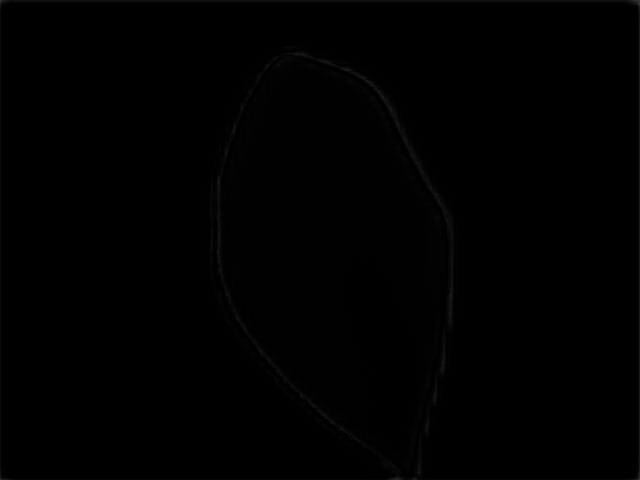

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Autoencoder Evaluation - MSE: 0.0028, Average SSIM: 0.8905


In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Thermal images/JPG/IR_01387.jpg')
test_image_resized = cv2.resize(test_image, (640, 480)) / 255.0
test_image_resized = np.expand_dims(test_image_resized, axis=0)

# Reconstruct and analyze
reconstructed = autoencoder.predict(test_image_resized)
error_map,mixed_pixel_percentage = analyze_mixed_pixels(test_image_resized, reconstructed)
#, object_composition, error_map
print(f"Mixed Pixel Percentage: {mixed_pixel_percentage:.2f}%")
#print("Object Composition in Mixed Pixels:", object_composition)

# Display error map
cv2_imshow((error_map * 255).astype(np.uint8))

# Evaluate performance
X_test_reconstructed = autoencoder.predict(test_image_resized)
mse, avg_ssim = evaluate_autoencoder(test_image_resized, X_test_reconstructed)

print(f"Autoencoder Evaluation - MSE: {mse:.4f}, Average SSIM: {avg_ssim:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Mixed Pixel Percentage: 5.53%


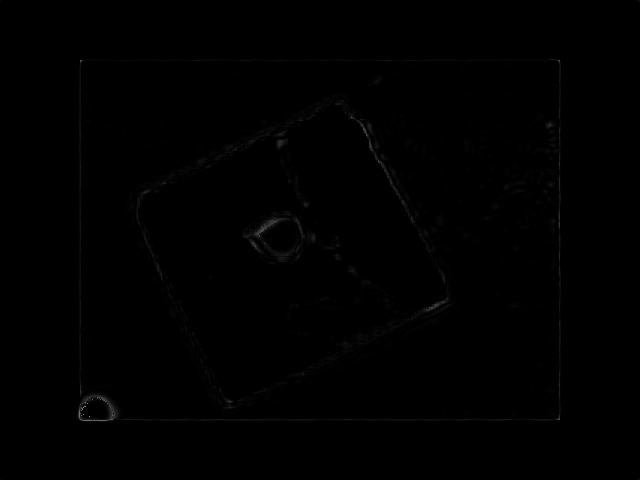

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Autoencoder Evaluation - MSE: 0.0028, Average SSIM: 0.8339


In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Thermal images/JPG/Video3_50.jpg')
test_image_resized = cv2.resize(test_image, (640, 480)) / 255.0
test_image_resized = np.expand_dims(test_image_resized, axis=0)

# Reconstruct and analyze
reconstructed = autoencoder.predict(test_image_resized)
error_map,mixed_pixel_percentage = analyze_mixed_pixels(test_image_resized, reconstructed)
#, object_composition, error_map
print(f"Mixed Pixel Percentage: {mixed_pixel_percentage:.2f}%")
#print("Object Composition in Mixed Pixels:", object_composition)

# Display error map
cv2_imshow((error_map * 255).astype(np.uint8))

# Evaluate performance
X_test_reconstructed = autoencoder.predict(test_image_resized)
mse, avg_ssim = evaluate_autoencoder(test_image_resized, X_test_reconstructed)

print(f"Autoencoder Evaluation - MSE: {mse:.4f}, Average SSIM: {avg_ssim:.4f}")